# 1. 数据准备

## 1.1 电厂导出数据准备（导出并合并为年度日导出数据）

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


### 1.1.1 合并上下半年格式机组运行特征数据为整年数据

In [2]:

#read feature files (1-6 & 7-12) into dataframes1_6 and dataframes7_12
directory = r"C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\2023年安庆电厂部分数据导出"
# List to hold each DataFrame
dataframes1_6 = []
dataframes7_12 = []
dataframes1_12 = []
feature_names = []

# Read 2nd sheets from 1st half year feature files(e.g.2023年安庆运行小时1-6月.xls) and store in dataframes1_6
# Loop through all files in the directory
for file in os.listdir(directory):
    if file.endswith('1-6月.xls'):
        # Construct full file path
        file_path = os.path.join(directory, file)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path,sheet_name='数据台账')

        #store the feature names
        feature_names.append(df.iloc[0,2])
        
        # Append the DataFrame to the list
        dataframes1_6.append(df.iloc[2::])

# Read 2nd sheets from last half year feature files(e.g.2023年安庆运行小时7-12月.xls) and store in dataframes7_12
for file in os.listdir(directory):
    if file.endswith('7-12月.xls'):
        # Construct full file path
        file_path = os.path.join(directory, file)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path,sheet_name='数据台账')
        
        # Append the DataFrame to the list
        dataframes7_12.append(df.iloc[2::])


In [3]:
#feature names except teamp主汽温度
feature_names

['机主汽压力',
 '机再热汽温度',
 '发电厂用电率',
 '运行小时',
 '低缸排汽温度',
 '热力计算排烟温度',
 '氧量',
 '空预器漏风率',
 '真空',
 '炉给水温度',
 '平均负荷',
 '送风温度']

In [4]:
#feature num - 1(主汽温度) = 12 主汽温度外除共12个特征
len(feature_names)

12

In [5]:
#从上下半年的dataframes1_6， dataframes7_12合并 12 个半年特征数据为整年dataframes1_12
for i in range(len(feature_names)):
    dataframes1_12.append(pd.concat([dataframes1_6[i], dataframes7_12[i]], ignore_index= True))

In [6]:
#输出合并后的dataframes1_12中第一个特征(机主汽压力)的整年数据
dataframes1_12[0]

,序号,日期,#1机组,#2机组,#3机组,#4机组
0,1.0,2023-01-01,0,11.65,21.54,21.48
1,2.0,2023-01-02,0,11.75,24.09,22.99
2,3.0,2023-01-03,15.65,13.42,26.45,26.1
3,4.0,2023-01-04,12.3,13.4,23.87,23.68
4,5.0,2023-01-05,13.71,13.86,26.52,26.15
...,...,...,...,...,...,...
360,180.0,2023-12-27,12.56,12.65,26.18,26.12
361,181.0,2023-12-28,12.9,13.19,27.96,27.83
362,182.0,2023-12-29,14.32,14.6,28.11,28.02
363,183.0,2023-12-30,12.65,12.37,25.56,25.09


### 1.1.2 合并其他格式特征数据（主汽温度）：1-3月 4-7月 8-12月 为整年数据

In [7]:

#read temprature feature files (1-3 & 4-7 & 8-12) and combine into all year data
file_path = r"C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\2023年安庆电厂部分数据导出\temp"

# Read 2nd sheets hours data from 1-3 file
temp_dataSheet_1_3 = pd.read_excel(file_path + "\\2023年主汽温度1-3.xls", sheet_name='数据台账')

# Read 2nd sheets hours data from 4-7 file
temp_dataSheet_4_7 = pd.read_excel(file_path + "\\2023年主汽温度4-7.xls", sheet_name='数据台账')

# Read 2nd sheets hours data from 8-12 file
temp_dataSheet_8_12 = pd.read_excel(file_path + "\\2023年主汽温度8-12.xls", sheet_name='数据台账')

#drop the 0 and 1 redundant row
temp_df_1_3 = temp_dataSheet_1_3.drop([0, 1])
temp_df_4_7 = temp_dataSheet_4_7.drop([0, 1])
temp_df_8_12 = temp_dataSheet_8_12.drop([0, 1])

#combine data from 3 quarters year
temp_df_all_year = pd.concat([temp_df_1_3,temp_df_4_7,temp_df_8_12], ignore_index= True)

In [8]:
temp_df_all_year

,序号,日期,#1机组,#2机组,#3机组,#4机组
0,1.0,2023-01-01,0,545.48,593.5,599.23
1,2.0,2023-01-02,0,545.07,596.18,598.56
2,3.0,2023-01-03,537.59,542.39,596.74,598.34
3,4.0,2023-01-04,540.04,542.3,595.06,597.34
4,5.0,2023-01-05,539.85,541.28,595.9,596.14
...,...,...,...,...,...,...
360,149.0,2023-12-27,540.61,539.96,598.08,599.32
361,150.0,2023-12-28,543.43,541.37,598.39,599.64
362,151.0,2023-12-29,543.74,541.64,597.71,598.78
363,152.0,2023-12-30,543.24,539.7,598.61,599.63


### 1.1.3 合并所有13个特征数据（含主汽温度）的整年数据到dataframes1_12中

In [9]:
#添加主汽温度到dfs中并增加该特征名到feature_names
dataframes1_12.append(temp_df_all_year)
feature_names.append("主汽温度")

In [10]:
#已添加所有特征名到feature_names
feature_names[-1]

'主汽温度'

In [11]:
#添加主汽温度到dfs中后dataframes1_12中有包含13个特征全年数据的df
len(dataframes1_12)

13

In [12]:
dataframes1_12[-1]

,序号,日期,#1机组,#2机组,#3机组,#4机组
0,1.0,2023-01-01,0,545.48,593.5,599.23
1,2.0,2023-01-02,0,545.07,596.18,598.56
2,3.0,2023-01-03,537.59,542.39,596.74,598.34
3,4.0,2023-01-04,540.04,542.3,595.06,597.34
4,5.0,2023-01-05,539.85,541.28,595.9,596.14
...,...,...,...,...,...,...
360,149.0,2023-12-27,540.61,539.96,598.08,599.32
361,150.0,2023-12-28,543.43,541.37,598.39,599.64
362,151.0,2023-12-29,543.74,541.64,597.71,598.78
363,152.0,2023-12-30,543.24,539.7,598.61,599.63


### 1.1.4  筛选分类13个特征全年数据中的#1,2,3,4 机组数据

In [13]:
dataframes1_12_1 = []
dataframes1_12_2 = []
dataframes1_12_3 = []
dataframes1_12_4 = []

#Select only  #1机组全年运行时间数据
for i in range(len(dataframes1_12)):
    dataframes1_12_1.append(dataframes1_12[i][['日期', '#1机组']])
#Select only  #2机组全年运行时间数据
for i in range(len(dataframes1_12)):
    dataframes1_12_2.append(dataframes1_12[i][['日期', '#2机组']])
#Select only  #3机组全年运行时间数据
for i in range(len(dataframes1_12)):
    dataframes1_12_3.append(dataframes1_12[i][['日期', '#3机组']])


In [14]:
#dataframes1_12第三个feature file（发电厂用电率） 缺失 #4 数据 需要单独处理
dataframes1_12[2]

,序号,日期,#1机组,#2机组,#3机组
0,1.0,2023-01-01,0,7.11,3.45
1,2.0,2023-01-02,0,7.23,3.24
2,3.0,2023-01-03,5.19,7.59,3.07
3,4.0,2023-01-04,4.92,5.45,3.29
4,5.0,2023-01-05,4.63,5.14,3.26
...,...,...,...,...,...
360,180.0,2023-12-27,4.9,5.2,3.12
361,181.0,2023-12-28,4.48,4.63,3.02
362,182.0,2023-12-29,4.58,4.65,3.04
363,183.0,2023-12-30,5.1,5.42,3.12


In [15]:
# 单独处理 dataframes1_12[2]（发电厂用电率） 添加新列'#4机组'，初始值为 NaN 使其和其他特征df相同 都包含4个机组
dataframes1_12[2] = pd.concat([dataframes1_12[2], pd.DataFrame(columns=['#4机组'])], sort=False)
#合并后#4机组加入NaA值的发电厂用电率1-12月数据
dataframes1_12[2]

,序号,日期,#1机组,#2机组,#3机组,#4机组
0,1.0,2023-01-01,0,7.11,3.45,NaN
1,2.0,2023-01-02,0,7.23,3.24,NaN
2,3.0,2023-01-03,5.19,7.59,3.07,NaN
3,4.0,2023-01-04,4.92,5.45,3.29,NaN
4,5.0,2023-01-05,4.63,5.14,3.26,NaN
...,...,...,...,...,...,...
360,180.0,2023-12-27,4.9,5.2,3.12,NaN
361,181.0,2023-12-28,4.48,4.63,3.02,NaN
362,182.0,2023-12-29,4.58,4.65,3.04,NaN
363,183.0,2023-12-30,5.1,5.42,3.12,NaN


In [16]:
#Select only  #4机组全年运行时间数据
for i in range(len(dataframes1_12)):
    dataframes1_12_4.append(dataframes1_12[i][['日期', '#4机组']])

In [17]:
# 为每个机组对应的DataFrame 的特征列添加对应特征名后缀，避免合并时列名冲突 
#日期	#1机组 ------>日期	对应的特征名称
for i, df in enumerate(dataframes1_12_1):
    # 重命名除 '日期' 列之外的列，添加后缀
    feature_name = feature_names[i]  # 对应的特征名称列表
    df.columns = ['日期'] + [f"{feature_names[i]}"]
for i, df in enumerate(dataframes1_12_2):
    # 重命名除 '日期' 列之外的列，添加后缀
    feature_name = feature_names[i]  # 对应的特征名称列表
    df.columns = ['日期'] + [f"{feature_names[i]}"]
for i, df in enumerate(dataframes1_12_3):
    # 重命名除 '日期' 列之外的列，添加后缀
    feature_name = feature_names[i]  # 对应的特征名称列表
    df.columns = ['日期'] + [f"{feature_names[i]}"]
for i, df in enumerate(dataframes1_12_4):
    # 重命名除 '日期' 列之外的列，添加后缀
    feature_name = feature_names[i]  # 对应的特征名称列表
    df.columns = ['日期'] + [f"{feature_names[i]}"]

In [18]:
#单独处理后 机组4全年发电率数据 初始值为 NaN
dataframes1_12_4[2]

,日期,发电厂用电率
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,NaN
...,...,...
360,2023-12-27,NaN
361,2023-12-28,NaN
362,2023-12-29,NaN
363,2023-12-30,NaN


#### 机组1全年13个特征数据

In [19]:
dataframes1_12_1

[             日期  机主汽压力
 0    2023-01-01      0
 1    2023-01-02      0
 2    2023-01-03  15.65
 3    2023-01-04   12.3
 4    2023-01-05  13.71
 ..          ...    ...
 360  2023-12-27  12.56
 361  2023-12-28   12.9
 362  2023-12-29  14.32
 363  2023-12-30  12.65
 364  2023-12-31  11.05
 
 [365 rows x 2 columns],
              日期  机再热汽温度
 0    2023-01-01       0
 1    2023-01-02       0
 2    2023-01-03  533.63
 3    2023-01-04   512.9
 4    2023-01-05  515.22
 ..          ...     ...
 360  2023-12-27  517.56
 361  2023-12-28  524.97
 362  2023-12-29  532.69
 363  2023-12-30  521.96
 364  2023-12-31  518.19
 
 [365 rows x 2 columns],
              日期 发电厂用电率
 0    2023-01-01      0
 1    2023-01-02      0
 2    2023-01-03   5.19
 3    2023-01-04   4.92
 4    2023-01-05   4.63
 ..          ...    ...
 360  2023-12-27    4.9
 361  2023-12-28   4.48
 362  2023-12-29   4.58
 363  2023-12-30    5.1
 364  2023-12-31   5.62
 
 [365 rows x 2 columns],
              日期  运行小时
 0    2023-01-01    

### 1.1.5 合并#1,2,3,4 每个全年机组数据的13个特征到一个df

In [20]:
# 合并 每个机组 all feature as a DataFrame
from functools import reduce

# 确保每个 DataFrame 的 '时间' 列为 datetime 格式
for df in dataframes1_12_1:
    df.loc[:, '日期'] = pd.to_datetime(df['日期'],format='%Y-%m-%d')
for df in dataframes1_12_2:
    df.loc[:, '日期'] = pd.to_datetime(df['日期'],format='%Y-%m-%d')
for df in dataframes1_12_3:
    df.loc[:, '日期'] = pd.to_datetime(df['日期'],format='%Y-%m-%d')
for df in dataframes1_12_4:
    df.loc[:, '日期'] = pd.to_datetime(df['日期'],format='%Y-%m-%d')
# 使用 reduce 和 pd.merge 进行合并
merged_df1 = reduce(lambda left, right: pd.merge(left, right, on='日期', how='outer'), dataframes1_12_1)
merged_df2 = reduce(lambda left, right: pd.merge(left, right, on='日期', how='outer'), dataframes1_12_2)
merged_df3 = reduce(lambda left, right: pd.merge(left, right, on='日期', how='outer'), dataframes1_12_3)
merged_df4 = reduce(lambda left, right: pd.merge(left, right, on='日期', how='outer'), dataframes1_12_4)

In [21]:
merged_df1

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,炉给水温度,平均负荷,送风温度,主汽温度
0,2023-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2023-01-02 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2023-01-03 00:00:00,15.65,533.63,5.19,8.86,41.57,0,4.81,4.41,-93.92,260.29,142.22,33.07,537.59
3,2023-01-04 00:00:00,12.3,512.9,4.92,24,26.85,119.69,4.39,2.4,-99.81,245.99,206.67,7.87,540.04
4,2023-01-05 00:00:00,13.71,515.22,4.63,24,28.49,123.48,4.05,3.02,-99.43,250.55,230.42,9.6,539.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27 00:00:00,12.56,517.56,4.9,24,25.15,124.16,4.42,4.44,-99.7,243.15,202.07,8.88,540.61
361,2023-12-28 00:00:00,12.9,524.97,4.48,24,26.94,131.81,3.85,4.2,-99.35,248.31,226.12,8.82,543.43
362,2023-12-29 00:00:00,14.32,532.69,4.58,24,29.93,133.3,3.16,4.07,-98.7,260.38,270.42,9.04,543.74
363,2023-12-30 00:00:00,12.65,521.96,5.1,24,26.05,125.27,4.52,5.08,-99.52,243.36,202.92,11.21,543.24


## 注意#4机组厂用电率缺失

In [22]:
merged_df4

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,炉给水温度,平均负荷,送风温度,主汽温度
0,2023-01-01 00:00:00,21.48,615.19,NaN,24,26.83,107.76,4.18,2.85,-99.03,278.9,721.08,8.68,599.23
1,2023-01-02 00:00:00,22.99,615.27,NaN,24,27.48,106.92,4.16,3.73,-98.95,281.95,772.25,7.41,598.56
2,2023-01-03 00:00:00,26.1,613.33,NaN,24,29.23,109.89,3.59,4.08,-98.47,291.32,878.83,8.23,598.34
3,2023-01-04 00:00:00,23.68,616.58,NaN,24,27.63,107.76,3.92,2.97,-98.8,284.68,801.29,8.45,597.34
4,2023-01-05 00:00:00,26.15,614.81,NaN,24,29.17,112.11,3.35,2.96,-98.38,291.63,890.63,10.16,596.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27 00:00:00,26.12,613.64,NaN,24,30.09,113.35,4.15,8.13,-97.92,290.1,881.52,9.51,599.32
361,2023-12-28 00:00:00,27.83,611.98,NaN,24,30.95,114.66,3.88,8.26,-97.67,294.74,943.68,8.47,599.64
362,2023-12-29 00:00:00,28.02,614.26,NaN,24,31.36,114.24,3.81,7.48,-97.53,295.43,953.38,9.27,598.78
363,2023-12-30 00:00:00,25.09,614.7,NaN,24,30.68,112.4,4.37,7.89,-97.85,287.45,842.21,11.49,599.63


## 1.2 燃料数据准备（导出月度数据并resample为年日度数据）

**注意缺失数据 #2 5月 #4 3月**

In [23]:
# 读入燃烧月度数据并把每个机组转置到不同df
directory_file = r'C:\Users\RY\Desktop\火电碳排放影响因素识别与降碳措施研究\电厂调研数据\2023年安庆电厂部分数据导出\燃料月度数据.xlsx'

df = pd.read_excel(directory_file,header=None)
#每个机组燃料月度数据
df_monthly_fuel_1 = df.iloc[:6].T
df_monthly_fuel_2 = df.iloc[7:13].T
df_monthly_fuel_3 = df.iloc[14:20].T
df_monthly_fuel_4 = df.iloc[21:33].T

df_fuel_1 = []
df_fuel_2 = []
df_fuel_3 = []
df_fuel_4 = []

#将第一行特征名设置为列名并删除
    ##1机组第一行特征名：
    #1机组  空干基含碳量（%）收到基挥发分（%）收到基灰分（%）收到基低位发热量(kJ/kg) 全水分（%）

df_monthly_fuel_1.columns = df_monthly_fuel_1.iloc[0]  # 取第一行作为列名
df_monthly_fuel_1 = df_monthly_fuel_1.drop(df_monthly_fuel_1.index[0]) #删除第一行

df_monthly_fuel_2.columns = df_monthly_fuel_2.iloc[0]  # 取第一行作为列名
df_monthly_fuel_2 = df_monthly_fuel_2.drop(df_monthly_fuel_2.index[0]) #删除第一行

df_monthly_fuel_3.columns = df_monthly_fuel_3.iloc[0]  # 取第一行作为列名
df_monthly_fuel_3 = df_monthly_fuel_3.drop(df_monthly_fuel_3.index[0]) #删除第一行

df_monthly_fuel_4.columns = df_monthly_fuel_4.iloc[0]  # 取第一行作为列名
df_monthly_fuel_4 = df_monthly_fuel_4.drop(df_monthly_fuel_4.index[0]) #删除第一行


In [24]:
df_monthly_fuel_1

,#1机组,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
1,1月,54.08,24.33,23.39,18369.7,14.2
2,2月,55.84,24.92,20.89,18971.4,15.2
3,3月,55.7,20.05,21.81,18929.8,14.4
4,4月,53.65,24.18,21.89,18622.5,15.3
5,5月,56.97,23.47,19.61,18607.7,17.8
6,6月,57.45,24.41,19.06,19317.7,15.8
7,7月,56.92,24.36,20.11,19177.3,15.4
8,8月,56.84,24.37,19.8,18997.53,15.6
9,9月,55.14,23.89,20.54,18473.28,15.9
10,10月,56.13,24.83,21.51,19142.5,13.7


In [25]:
(df_monthly_fuel_2.iloc[3] + df_monthly_fuel_2.iloc[5] ).iloc[1::]/2

0
空干基含碳量（%）           54.575
收到基挥发分（%）           24.175
收到基灰分（%）            20.915
收到基低位发热量(kJ/kg)    18699.5
全水分（%）               15.75
dtype: object

In [26]:
df_monthly_fuel_2.iloc[4].iloc[1::] = (df_monthly_fuel_2.iloc[3] + df_monthly_fuel_2.iloc[5] ).iloc[1::]/2

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20068\241992712.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_monthly_fuel_2.iloc[4].iloc[1::] = (df_monthly_fuel_2.iloc[3] + df_monthly_fuel_2.iloc[5] ).iloc[1::]/2


In [27]:
df_monthly_fuel_2

,#2机组,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
1,1月,53.8,24.57,23.03,18518.9,14.3
2,2月,56.16,25.13,20.26,19178.7,15.3
3,3月,55.39,25.01,21.86,18909.98,14.4
4,4月,53.29,24.2,22.04,18555.3,15.3
5,5月,54.575,24.175,20.915,18699.5,15.75
6,6月,55.86,24.15,19.79,18843.7,16.2
7,7月,56.39,24.39,20.05,19198.2,15.4
8,8月,57.22,24.37,19.97,18995.11,15.4
9,9月,54.65,24.08,20.66,18474,16.9
10,10月,54.04,24.3,22.33,18701.6,14.2


In [28]:
#把第一列月份转为每月第一天 且为日期类型
df_monthly_fuel_1.iloc[:,0] = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')
df_monthly_fuel_2.iloc[:,0] = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')
df_monthly_fuel_3.iloc[:,0] = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')
df_monthly_fuel_4.iloc[:,0] = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')

#把第一列设为索引，以resample12个月为每日数据
df_monthly_fuel_1.set_index("#1机组", inplace=True)
df_monthly_fuel_2.set_index("#2机组", inplace=True)
df_monthly_fuel_3.set_index("#3机组", inplace=True)
df_monthly_fuel_4.set_index("#4机组", inplace=True)

#确定新的日期范围
start_date = df_monthly_fuel_1.index.min() - pd.DateOffset(day=1)
end_date = df_monthly_fuel_1.index.max() + pd.DateOffset(day=31)
#生成一个从 start_date 到 end_date 的日期范围，频率为每天 ('D')。
dates = pd.date_range(start_date, end_date, freq='D')
#将生成的日期范围命名为 时间
dates.name = '时间'

#resample月度数据为日度
df_fuel_1 = df_monthly_fuel_1.reindex(dates, method='ffill')
df_fuel_2 = df_monthly_fuel_2.reindex(dates, method='ffill')
df_fuel_3 = df_monthly_fuel_3.reindex(dates, method='ffill')
df_fuel_4 = df_monthly_fuel_4.reindex(dates, method='ffill')

# 将 df_monthly_fuel_1，2，3，4 的索引重置为列以便后续合并df
df_fuel_1 = df_fuel_1.reset_index()
df_fuel_2 = df_fuel_2.reset_index()
df_fuel_3 = df_fuel_3.reset_index()
df_fuel_4 = df_fuel_4.reset_index()

D:\Anaconda\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [29]:
df_fuel_3[-33:-20]

,时间,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
332,2023-11-29,57.93,24.98,18.64,19916.36,14.3
333,2023-11-30,57.93,24.98,18.64,19916.36,14.3
334,2023-12-01,60.14,24.76,14.96,20186.4,17.1
335,2023-12-02,60.14,24.76,14.96,20186.4,17.1
336,2023-12-03,60.14,24.76,14.96,20186.4,17.1
337,2023-12-04,60.14,24.76,14.96,20186.4,17.1
338,2023-12-05,60.14,24.76,14.96,20186.4,17.1
339,2023-12-06,60.14,24.76,14.96,20186.4,17.1
340,2023-12-07,60.14,24.76,14.96,20186.4,17.1
341,2023-12-08,60.14,24.76,14.96,20186.4,17.1


In [30]:
df_fuel_3[140:160]

,时间,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
140,2023-05-21,55.04,23.69,17.84,18890,18.6
141,2023-05-22,55.04,23.69,17.84,18890,18.6
142,2023-05-23,55.04,23.69,17.84,18890,18.6
143,2023-05-24,55.04,23.69,17.84,18890,18.6
144,2023-05-25,55.04,23.69,17.84,18890,18.6
145,2023-05-26,55.04,23.69,17.84,18890,18.6
146,2023-05-27,55.04,23.69,17.84,18890,18.6
147,2023-05-28,55.04,23.69,17.84,18890,18.6
148,2023-05-29,55.04,23.69,17.84,18890,18.6
149,2023-05-30,55.04,23.69,17.84,18890,18.6


## 1.3 碳排放量数据准备(读取resample从5分钟汇总到日的年度数据)

<span style="color:red">负荷（MW）、二氧化碳（%）、 '氧含量(%)'、烟气流量(m3/h)和碳排放量（t）如何聚合为天数据</span>

In [31]:
#读取安庆电厂各个机组碳排放量预处理后文件 1-12月  
daily_df1 = pd.read_excel (r"C:\Users\RY\Desktop\Jupiter\神皖安庆一号清洗.xlsx")


In [32]:
daily_df1

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-03,141.087714,1018.34,0.000000,649903.593143,1144.49,1062.949749
1,2023-01-04,206.725734,3601.18,0.051923,693832.805839,4176.63,838.917627
2,2023-01-05,230.600729,3922.27,0.000000,727300.095556,4807.57,863.165329
3,2023-01-06,171.070951,3542.23,0.029894,626377.361937,3713.79,902.415743
4,2023-01-07,164.837187,3548.37,0.000000,608124.562014,3602.72,896.849022
...,...,...,...,...,...,...,...
305,2023-12-27,201.247993,3893.45,7.624859,668291.377958,4386.12,912.860320
306,2023-12-28,232.979375,4105.45,7.037431,710311.167257,4908.67,872.529605
307,2023-12-29,275.470769,4314.20,6.160070,773871.840315,5626.73,853.123715
308,2023-12-30,200.170285,3807.49,7.636619,645904.639253,4153.27,881.934531


In [33]:
daily_df2 = pd.read_excel (r"C:\Users\RY\Desktop\Jupiter\神皖安庆二号清洗.xlsx")

In [34]:
daily_df2

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,159.684784,3608.30,0.000000,604870.009640,3634.75,966.443824
1,2023-01-02,159.770799,3780.31,0.000000,595487.742118,3749.47,961.816916
2,2023-01-03,208.480104,4145.15,0.000000,672022.549236,4651.58,916.224459
3,2023-01-04,204.764266,4014.39,0.030315,670814.690769,4530.52,919.749659
4,2023-01-05,235.206736,4206.09,0.044132,724803.635521,5135.21,902.760203
...,...,...,...,...,...,...,...
269,2023-12-27,191.657544,3891.46,6.803649,558087.487754,3645.13,794.340575
270,2023-12-28,219.844826,4096.45,6.279340,597386.551007,4120.84,774.897876
271,2023-12-29,274.055629,4410.56,5.057797,661955.802413,4904.17,744.289131
272,2023-12-30,183.665231,3801.62,6.998612,545215.920712,3479.94,805.372623


In [35]:
daily_df3 = pd.read_excel (r"C:\Users\RY\Desktop\Jupiter\神皖安庆三号清洗.xlsx")
daily_df4= pd.read_excel (r"C:\Users\RY\Desktop\Jupiter\神皖安庆四号清洗.xlsx")

In [36]:
daily_df3

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,706.447302,5516.67,0.000000,1.644924e+03,14.81,0.917900
1,2023-01-02,789.804861,5757.14,0.015243,1.914438e+03,18.28,0.959159
2,2023-01-03,872.662778,5749.33,0.000000,2.033970e+03,19.28,0.914859
3,2023-01-04,793.895070,5695.00,0.017098,1.920085e+03,18.34,0.952063
4,2023-01-05,893.033021,5760.00,0.014583,2.140576e+03,20.66,0.945756
...,...,...,...,...,...,...,...
300,2023-12-27,869.711250,2834.25,4.432951,1.673910e+06,7905.93,371.593445
301,2023-12-28,945.729028,2821.94,3.774826,1.765783e+06,8322.39,360.841710
302,2023-12-29,958.533007,2840.27,3.742483,1.796475e+06,8493.55,365.821446
303,2023-12-30,854.976303,2806.36,4.272289,1.566006e+06,7326.34,355.232213


In [37]:
daily_df4

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,725.194173,3530.72,0.000000,2.106817e+03,12.34,0.727491
1,2023-01-02,772.629410,3749.28,0.039896,2.241022e+03,14.10,0.752962
2,2023-01-03,880.620972,3875.57,0.037708,2.459372e+03,15.83,0.739692
3,2023-01-04,803.312028,3778.85,0.029720,2.299317e+03,14.61,0.750852
4,2023-01-05,891.729132,4051.45,0.000000,2.474725e+03,16.90,0.770482
...,...,...,...,...,...,...,...
305,2023-12-27,885.236197,4432.61,5.055493,2.259751e+06,16692.62,788.513341
306,2023-12-28,953.093993,4682.05,4.830139,2.316513e+06,18050.18,776.642777
307,2023-12-29,962.928834,4606.29,4.541731,2.321311e+06,17797.56,772.054221
308,2023-12-30,850.992135,4340.04,5.210249,2.216995e+06,16045.34,799.697391


## 1.4 合并所有数据为训练集并转换数据类型为数值

In [38]:
# 确保 merged_dfs 中 '日期' 列是 datetime 类型以进行合并 (本来为obj)
merged_df1['日期'] = pd.to_datetime(merged_df1['日期'])

In [39]:
merged_df2['日期'] = pd.to_datetime(merged_df2['日期'])

In [40]:
merged_df3['日期'] = pd.to_datetime(merged_df3['日期'])

In [41]:
merged_df4['日期'] = pd.to_datetime(merged_df4['日期'])

In [42]:
merged_df3

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,炉给水温度,平均负荷,送风温度,主汽温度
0,2023-01-01,21.54,602.52,3.45,24,27.28,108.02,3.41,0,-98.61,277.42,701.63,9.05,593.5
1,2023-01-02,24.09,604,3.24,24,28.33,108.05,3.06,0,-98.59,284.74,788.63,8.14,596.18
2,2023-01-03,26.45,605.84,3.07,24,29.57,109.74,2.47,0,-98.07,291.8,870.17,8.62,596.74
3,2023-01-04,23.87,603.93,3.29,24,28.32,107.05,3.14,0,-98.12,284.86,792.13,8.45,595.06
4,2023-01-05,26.52,605.5,3.26,24,29.68,111.3,2.67,0,-97.75,292.91,891.25,10.27,595.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.18,615.19,3.12,24,29.73,113.95,3.64,7.05,-97.82,295.32,866.46,9.73,598.08
361,2023-12-28,27.96,614.45,3.02,24,30.43,115.83,3.05,6.29,-97.56,298.26,938.12,8.97,598.39
362,2023-12-29,28.11,613.35,3.04,24,31,116.15,3.11,5.77,-96.99,298.95,947.5,9.69,597.71
363,2023-12-30,25.56,614.34,3.12,24,31.05,115.04,3.45,6.52,-96.55,294.51,840.83,11.2,598.61


In [43]:
merged_df4

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,炉给水温度,平均负荷,送风温度,主汽温度
0,2023-01-01,21.48,615.19,NaN,24,26.83,107.76,4.18,2.85,-99.03,278.9,721.08,8.68,599.23
1,2023-01-02,22.99,615.27,NaN,24,27.48,106.92,4.16,3.73,-98.95,281.95,772.25,7.41,598.56
2,2023-01-03,26.1,613.33,NaN,24,29.23,109.89,3.59,4.08,-98.47,291.32,878.83,8.23,598.34
3,2023-01-04,23.68,616.58,NaN,24,27.63,107.76,3.92,2.97,-98.8,284.68,801.29,8.45,597.34
4,2023-01-05,26.15,614.81,NaN,24,29.17,112.11,3.35,2.96,-98.38,291.63,890.63,10.16,596.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.12,613.64,NaN,24,30.09,113.35,4.15,8.13,-97.92,290.1,881.52,9.51,599.32
361,2023-12-28,27.83,611.98,NaN,24,30.95,114.66,3.88,8.26,-97.67,294.74,943.68,8.47,599.64
362,2023-12-29,28.02,614.26,NaN,24,31.36,114.24,3.81,7.48,-97.53,295.43,953.38,9.27,598.78
363,2023-12-30,25.09,614.7,NaN,24,30.68,112.4,4.37,7.89,-97.85,287.45,842.21,11.49,599.63


In [44]:
df_fuel_3

,时间,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
0,2023-01-01,56.96,24.84,18.32,19088.5,17.3
1,2023-01-02,56.96,24.84,18.32,19088.5,17.3
2,2023-01-03,56.96,24.84,18.32,19088.5,17.3
3,2023-01-04,56.96,24.84,18.32,19088.5,17.3
4,2023-01-05,56.96,24.84,18.32,19088.5,17.3
...,...,...,...,...,...,...
360,2023-12-27,60.14,24.76,14.96,20186.4,17.1
361,2023-12-28,60.14,24.76,14.96,20186.4,17.1
362,2023-12-29,60.14,24.76,14.96,20186.4,17.1
363,2023-12-30,60.14,24.76,14.96,20186.4,17.1


In [45]:
df_fuel_4

,时间,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
0,2023-01-01,56.66,24.78,18.4,19062,17.3
1,2023-01-02,56.66,24.78,18.4,19062,17.3
2,2023-01-03,56.66,24.78,18.4,19062,17.3
3,2023-01-04,56.66,24.78,18.4,19062,17.3
4,2023-01-05,56.66,24.78,18.4,19062,17.3
...,...,...,...,...,...,...
360,2023-12-27,59.63,24.76,14.96,20194.1,17.1
361,2023-12-28,59.63,24.76,14.96,20194.1,17.1
362,2023-12-29,59.63,24.76,14.96,20194.1,17.1
363,2023-12-30,59.63,24.76,14.96,20194.1,17.1


In [46]:
daily_df3

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,706.447302,5516.67,0.000000,1.644924e+03,14.81,0.917900
1,2023-01-02,789.804861,5757.14,0.015243,1.914438e+03,18.28,0.959159
2,2023-01-03,872.662778,5749.33,0.000000,2.033970e+03,19.28,0.914859
3,2023-01-04,793.895070,5695.00,0.017098,1.920085e+03,18.34,0.952063
4,2023-01-05,893.033021,5760.00,0.014583,2.140576e+03,20.66,0.945756
...,...,...,...,...,...,...,...
300,2023-12-27,869.711250,2834.25,4.432951,1.673910e+06,7905.93,371.593445
301,2023-12-28,945.729028,2821.94,3.774826,1.765783e+06,8322.39,360.841710
302,2023-12-29,958.533007,2840.27,3.742483,1.796475e+06,8493.55,365.821446
303,2023-12-30,854.976303,2806.36,4.272289,1.566006e+06,7326.34,355.232213


In [47]:
daily_df4

,时间,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,725.194173,3530.72,0.000000,2.106817e+03,12.34,0.727491
1,2023-01-02,772.629410,3749.28,0.039896,2.241022e+03,14.10,0.752962
2,2023-01-03,880.620972,3875.57,0.037708,2.459372e+03,15.83,0.739692
3,2023-01-04,803.312028,3778.85,0.029720,2.299317e+03,14.61,0.750852
4,2023-01-05,891.729132,4051.45,0.000000,2.474725e+03,16.90,0.770482
...,...,...,...,...,...,...,...
305,2023-12-27,885.236197,4432.61,5.055493,2.259751e+06,16692.62,788.513341
306,2023-12-28,953.093993,4682.05,4.830139,2.316513e+06,18050.18,776.642777
307,2023-12-29,962.928834,4606.29,4.541731,2.321311e+06,17797.56,772.054221
308,2023-12-30,850.992135,4340.04,5.210249,2.216995e+06,16045.34,799.697391


In [48]:
#合并所有13个机组运行特征（merged_df1）和燃料特征到一个df1_fea_fuel
df1_fea_fuel = pd.merge(merged_df1, df_fuel_1, left_on='日期', right_on='时间', how='inner')

In [49]:
df2_fea_fuel = pd.merge(merged_df2, df_fuel_2, left_on='日期', right_on='时间', how='inner')

In [50]:
df3_fea_fuel = pd.merge(merged_df3, df_fuel_3, left_on='日期', right_on='时间', how='inner')
df4_fea_fuel = pd.merge(merged_df4, df_fuel_4, left_on='日期', right_on='时间', how='inner')

In [51]:
df3_fea_fuel

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,炉给水温度,平均负荷,送风温度,主汽温度,时间,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
0,2023-01-01,21.54,602.52,3.45,24,27.28,108.02,3.41,0,-98.61,277.42,701.63,9.05,593.5,2023-01-01,56.96,24.84,18.32,19088.5,17.3
1,2023-01-02,24.09,604,3.24,24,28.33,108.05,3.06,0,-98.59,284.74,788.63,8.14,596.18,2023-01-02,56.96,24.84,18.32,19088.5,17.3
2,2023-01-03,26.45,605.84,3.07,24,29.57,109.74,2.47,0,-98.07,291.8,870.17,8.62,596.74,2023-01-03,56.96,24.84,18.32,19088.5,17.3
3,2023-01-04,23.87,603.93,3.29,24,28.32,107.05,3.14,0,-98.12,284.86,792.13,8.45,595.06,2023-01-04,56.96,24.84,18.32,19088.5,17.3
4,2023-01-05,26.52,605.5,3.26,24,29.68,111.3,2.67,0,-97.75,292.91,891.25,10.27,595.9,2023-01-05,56.96,24.84,18.32,19088.5,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.18,615.19,3.12,24,29.73,113.95,3.64,7.05,-97.82,295.32,866.46,9.73,598.08,2023-12-27,60.14,24.76,14.96,20186.4,17.1
361,2023-12-28,27.96,614.45,3.02,24,30.43,115.83,3.05,6.29,-97.56,298.26,938.12,8.97,598.39,2023-12-28,60.14,24.76,14.96,20186.4,17.1
362,2023-12-29,28.11,613.35,3.04,24,31,116.15,3.11,5.77,-96.99,298.95,947.5,9.69,597.71,2023-12-29,60.14,24.76,14.96,20186.4,17.1
363,2023-12-30,25.56,614.34,3.12,24,31.05,115.04,3.45,6.52,-96.55,294.51,840.83,11.2,598.61,2023-12-30,60.14,24.76,14.96,20186.4,17.1


In [52]:
df4_fea_fuel

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,炉给水温度,平均负荷,送风温度,主汽温度,时间,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）
0,2023-01-01,21.48,615.19,NaN,24,26.83,107.76,4.18,2.85,-99.03,278.9,721.08,8.68,599.23,2023-01-01,56.66,24.78,18.4,19062,17.3
1,2023-01-02,22.99,615.27,NaN,24,27.48,106.92,4.16,3.73,-98.95,281.95,772.25,7.41,598.56,2023-01-02,56.66,24.78,18.4,19062,17.3
2,2023-01-03,26.1,613.33,NaN,24,29.23,109.89,3.59,4.08,-98.47,291.32,878.83,8.23,598.34,2023-01-03,56.66,24.78,18.4,19062,17.3
3,2023-01-04,23.68,616.58,NaN,24,27.63,107.76,3.92,2.97,-98.8,284.68,801.29,8.45,597.34,2023-01-04,56.66,24.78,18.4,19062,17.3
4,2023-01-05,26.15,614.81,NaN,24,29.17,112.11,3.35,2.96,-98.38,291.63,890.63,10.16,596.14,2023-01-05,56.66,24.78,18.4,19062,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.12,613.64,NaN,24,30.09,113.35,4.15,8.13,-97.92,290.1,881.52,9.51,599.32,2023-12-27,59.63,24.76,14.96,20194.1,17.1
361,2023-12-28,27.83,611.98,NaN,24,30.95,114.66,3.88,8.26,-97.67,294.74,943.68,8.47,599.64,2023-12-28,59.63,24.76,14.96,20194.1,17.1
362,2023-12-29,28.02,614.26,NaN,24,31.36,114.24,3.81,7.48,-97.53,295.43,953.38,9.27,598.78,2023-12-29,59.63,24.76,14.96,20194.1,17.1
363,2023-12-30,25.09,614.7,NaN,24,30.68,112.4,4.37,7.89,-97.85,287.45,842.21,11.49,599.63,2023-12-30,59.63,24.76,14.96,20194.1,17.1


In [53]:
# 合并df1_fea_fuel 和 碳排放数据（daily_df1）
df1_all_fea = pd.merge(df1_fea_fuel, daily_df1, how='outer')

In [54]:
df2_all_fea = pd.merge(df2_fea_fuel, daily_df2, how='outer')

In [55]:
df3_all_fea = pd.merge(df3_fea_fuel, daily_df3, how='outer')
df4_all_fea = pd.merge(df4_fea_fuel, daily_df4, how='outer')

In [56]:
df3_all_fea

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,21.54,602.52,3.45,24,27.28,108.02,3.41,0,-98.61,...,24.84,18.32,19088.5,17.3,706.447302,5516.67,0.000000,1.644924e+03,14.81,0.917900
1,2023-01-02,24.09,604,3.24,24,28.33,108.05,3.06,0,-98.59,...,24.84,18.32,19088.5,17.3,789.804861,5757.14,0.015243,1.914438e+03,18.28,0.959159
2,2023-01-03,26.45,605.84,3.07,24,29.57,109.74,2.47,0,-98.07,...,24.84,18.32,19088.5,17.3,872.662778,5749.33,0.000000,2.033970e+03,19.28,0.914859
3,2023-01-04,23.87,603.93,3.29,24,28.32,107.05,3.14,0,-98.12,...,24.84,18.32,19088.5,17.3,793.895070,5695.00,0.017098,1.920085e+03,18.34,0.952063
4,2023-01-05,26.52,605.5,3.26,24,29.68,111.3,2.67,0,-97.75,...,24.84,18.32,19088.5,17.3,893.033021,5760.00,0.014583,2.140576e+03,20.66,0.945756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.18,615.19,3.12,24,29.73,113.95,3.64,7.05,-97.82,...,24.76,14.96,20186.4,17.1,869.711250,2834.25,4.432951,1.673910e+06,7905.93,371.593445
361,2023-12-28,27.96,614.45,3.02,24,30.43,115.83,3.05,6.29,-97.56,...,24.76,14.96,20186.4,17.1,945.729028,2821.94,3.774826,1.765783e+06,8322.39,360.841710
362,2023-12-29,28.11,613.35,3.04,24,31,116.15,3.11,5.77,-96.99,...,24.76,14.96,20186.4,17.1,958.533007,2840.27,3.742483,1.796475e+06,8493.55,365.821446
363,2023-12-30,25.56,614.34,3.12,24,31.05,115.04,3.45,6.52,-96.55,...,24.76,14.96,20186.4,17.1,854.976303,2806.36,4.272289,1.566006e+06,7326.34,355.232213


In [57]:
df4_all_fea

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,21.48,615.19,NaN,24,26.83,107.76,4.18,2.85,-99.03,...,24.78,18.4,19062,17.3,725.194173,3530.72,0.000000,2.106817e+03,12.34,0.727491
1,2023-01-02,22.99,615.27,NaN,24,27.48,106.92,4.16,3.73,-98.95,...,24.78,18.4,19062,17.3,772.629410,3749.28,0.039896,2.241022e+03,14.10,0.752962
2,2023-01-03,26.1,613.33,NaN,24,29.23,109.89,3.59,4.08,-98.47,...,24.78,18.4,19062,17.3,880.620972,3875.57,0.037708,2.459372e+03,15.83,0.739692
3,2023-01-04,23.68,616.58,NaN,24,27.63,107.76,3.92,2.97,-98.8,...,24.78,18.4,19062,17.3,803.312028,3778.85,0.029720,2.299317e+03,14.61,0.750852
4,2023-01-05,26.15,614.81,NaN,24,29.17,112.11,3.35,2.96,-98.38,...,24.78,18.4,19062,17.3,891.729132,4051.45,0.000000,2.474725e+03,16.90,0.770482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.12,613.64,NaN,24,30.09,113.35,4.15,8.13,-97.92,...,24.76,14.96,20194.1,17.1,885.236197,4432.61,5.055493,2.259751e+06,16692.62,788.513341
361,2023-12-28,27.83,611.98,NaN,24,30.95,114.66,3.88,8.26,-97.67,...,24.76,14.96,20194.1,17.1,953.093993,4682.05,4.830139,2.316513e+06,18050.18,776.642777
362,2023-12-29,28.02,614.26,NaN,24,31.36,114.24,3.81,7.48,-97.53,...,24.76,14.96,20194.1,17.1,962.928834,4606.29,4.541731,2.321311e+06,17797.56,772.054221
363,2023-12-30,25.09,614.7,NaN,24,30.68,112.4,4.37,7.89,-97.85,...,24.76,14.96,20194.1,17.1,850.992135,4340.04,5.210249,2.216995e+06,16045.34,799.697391


In [58]:
# 删除合并后的右侧 '时间' 列，只保留左侧 '日期' 列
df1_all_fea.drop(columns=['时间'], inplace=True)

In [59]:
df2_all_fea.drop(columns=['时间'], inplace=True)

In [60]:
df3_all_fea.drop(columns=['时间'], inplace=True)
df4_all_fea.drop(columns=['时间'], inplace=True)

In [61]:
df3_all_fea

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,21.54,602.52,3.45,24,27.28,108.02,3.41,0,-98.61,...,24.84,18.32,19088.5,17.3,706.447302,5516.67,0.000000,1.644924e+03,14.81,0.917900
1,2023-01-02,24.09,604,3.24,24,28.33,108.05,3.06,0,-98.59,...,24.84,18.32,19088.5,17.3,789.804861,5757.14,0.015243,1.914438e+03,18.28,0.959159
2,2023-01-03,26.45,605.84,3.07,24,29.57,109.74,2.47,0,-98.07,...,24.84,18.32,19088.5,17.3,872.662778,5749.33,0.000000,2.033970e+03,19.28,0.914859
3,2023-01-04,23.87,603.93,3.29,24,28.32,107.05,3.14,0,-98.12,...,24.84,18.32,19088.5,17.3,793.895070,5695.00,0.017098,1.920085e+03,18.34,0.952063
4,2023-01-05,26.52,605.5,3.26,24,29.68,111.3,2.67,0,-97.75,...,24.84,18.32,19088.5,17.3,893.033021,5760.00,0.014583,2.140576e+03,20.66,0.945756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.18,615.19,3.12,24,29.73,113.95,3.64,7.05,-97.82,...,24.76,14.96,20186.4,17.1,869.711250,2834.25,4.432951,1.673910e+06,7905.93,371.593445
361,2023-12-28,27.96,614.45,3.02,24,30.43,115.83,3.05,6.29,-97.56,...,24.76,14.96,20186.4,17.1,945.729028,2821.94,3.774826,1.765783e+06,8322.39,360.841710
362,2023-12-29,28.11,613.35,3.04,24,31,116.15,3.11,5.77,-96.99,...,24.76,14.96,20186.4,17.1,958.533007,2840.27,3.742483,1.796475e+06,8493.55,365.821446
363,2023-12-30,25.56,614.34,3.12,24,31.05,115.04,3.45,6.52,-96.55,...,24.76,14.96,20186.4,17.1,854.976303,2806.36,4.272289,1.566006e+06,7326.34,355.232213


In [62]:
df4_all_fea

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,21.48,615.19,NaN,24,26.83,107.76,4.18,2.85,-99.03,...,24.78,18.4,19062,17.3,725.194173,3530.72,0.000000,2.106817e+03,12.34,0.727491
1,2023-01-02,22.99,615.27,NaN,24,27.48,106.92,4.16,3.73,-98.95,...,24.78,18.4,19062,17.3,772.629410,3749.28,0.039896,2.241022e+03,14.10,0.752962
2,2023-01-03,26.1,613.33,NaN,24,29.23,109.89,3.59,4.08,-98.47,...,24.78,18.4,19062,17.3,880.620972,3875.57,0.037708,2.459372e+03,15.83,0.739692
3,2023-01-04,23.68,616.58,NaN,24,27.63,107.76,3.92,2.97,-98.8,...,24.78,18.4,19062,17.3,803.312028,3778.85,0.029720,2.299317e+03,14.61,0.750852
4,2023-01-05,26.15,614.81,NaN,24,29.17,112.11,3.35,2.96,-98.38,...,24.78,18.4,19062,17.3,891.729132,4051.45,0.000000,2.474725e+03,16.90,0.770482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.12,613.64,NaN,24,30.09,113.35,4.15,8.13,-97.92,...,24.76,14.96,20194.1,17.1,885.236197,4432.61,5.055493,2.259751e+06,16692.62,788.513341
361,2023-12-28,27.83,611.98,NaN,24,30.95,114.66,3.88,8.26,-97.67,...,24.76,14.96,20194.1,17.1,953.093993,4682.05,4.830139,2.316513e+06,18050.18,776.642777
362,2023-12-29,28.02,614.26,NaN,24,31.36,114.24,3.81,7.48,-97.53,...,24.76,14.96,20194.1,17.1,962.928834,4606.29,4.541731,2.321311e+06,17797.56,772.054221
363,2023-12-30,25.09,614.7,NaN,24,30.68,112.4,4.37,7.89,-97.85,...,24.76,14.96,20194.1,17.1,850.992135,4340.04,5.210249,2.216995e+06,16045.34,799.697391


In [63]:
df3_all_fea.dtypes

日期                 datetime64[ns]
机主汽压力                      object
机再热汽温度                     object
发电厂用电率                     object
运行小时                       object
低缸排汽温度                     object
热力计算排烟温度                   object
氧量                         object
空预器漏风率                     object
真空                         object
炉给水温度                      object
平均负荷                       object
送风温度                       object
主汽温度                       object
空干基含碳量（%）                  object
收到基挥发分（%）                  object
收到基灰分（%）                   object
收到基低位发热量(kJ/kg)            object
全水分（%）                     object
负荷                        float64
二氧化碳                      float64
氧含量(%)                    float64
烟气流量                      float64
碳排放量                      float64
碳排放强度                     float64
dtype: object

In [64]:
df4_all_fea.dtypes

日期                 datetime64[ns]
机主汽压力                      object
机再热汽温度                     object
发电厂用电率                     object
运行小时                       object
低缸排汽温度                     object
热力计算排烟温度                   object
氧量                         object
空预器漏风率                     object
真空                         object
炉给水温度                      object
平均负荷                       object
送风温度                       object
主汽温度                       object
空干基含碳量（%）                  object
收到基挥发分（%）                  object
收到基灰分（%）                   object
收到基低位发热量(kJ/kg)            object
全水分（%）                     object
负荷                        float64
二氧化碳                      float64
氧含量(%)                    float64
烟气流量                      float64
碳排放量                      float64
碳排放强度                     float64
dtype: object

**转换数据类型为数值**

In [65]:

# 找出日期类型的列
date_columns1 = df1_all_fea.select_dtypes(include=['datetime64[ns]']).columns
# 对非日期类型的列进行数值转换
df1_all_fea[df1_all_fea.columns.difference(date_columns1)] = df1_all_fea[df1_all_fea.columns.difference(date_columns1)].apply(pd.to_numeric, errors='coerce')


In [66]:

# 找出日期类型的列
date_columns2 = df2_all_fea.select_dtypes(include=['datetime64[ns]']).columns
# 对非日期类型的列进行数值转换
df2_all_fea[df2_all_fea.columns.difference(date_columns2)] = df2_all_fea[df2_all_fea.columns.difference(date_columns2)].apply(pd.to_numeric, errors='coerce')


In [67]:

# 找出日期类型的列
date_columns3 = df3_all_fea.select_dtypes(include=['datetime64[ns]']).columns
# 对非日期类型的列进行数值转换
df3_all_fea[df3_all_fea.columns.difference(date_columns3)] = df3_all_fea[df3_all_fea.columns.difference(date_columns3)].apply(pd.to_numeric, errors='coerce')


# 找出日期类型的列
date_columns4 = df4_all_fea.select_dtypes(include=['datetime64[ns]']).columns
# 对非日期类型的列进行数值转换
df4_all_fea[df4_all_fea.columns.difference(date_columns4)] = df4_all_fea[df4_all_fea.columns.difference(date_columns4)].apply(pd.to_numeric, errors='coerce')


In [68]:
df3_all_fea.dtypes

日期                 datetime64[ns]
机主汽压力                     float64
机再热汽温度                    float64
发电厂用电率                    float64
运行小时                      float64
低缸排汽温度                    float64
热力计算排烟温度                  float64
氧量                        float64
空预器漏风率                    float64
真空                        float64
炉给水温度                     float64
平均负荷                      float64
送风温度                      float64
主汽温度                      float64
空干基含碳量（%）                 float64
收到基挥发分（%）                 float64
收到基灰分（%）                  float64
收到基低位发热量(kJ/kg)           float64
全水分（%）                    float64
负荷                        float64
二氧化碳                      float64
氧含量(%)                    float64
烟气流量                      float64
碳排放量                      float64
碳排放强度                     float64
dtype: object

In [69]:
df4_all_fea.dtypes

日期                 datetime64[ns]
机主汽压力                     float64
机再热汽温度                    float64
发电厂用电率                    float64
运行小时                      float64
低缸排汽温度                    float64
热力计算排烟温度                  float64
氧量                        float64
空预器漏风率                    float64
真空                        float64
炉给水温度                     float64
平均负荷                      float64
送风温度                      float64
主汽温度                      float64
空干基含碳量（%）                 float64
收到基挥发分（%）                 float64
收到基灰分（%）                  float64
收到基低位发热量(kJ/kg)           float64
全水分（%）                    float64
负荷                        float64
二氧化碳                      float64
氧含量(%)                    float64
烟气流量                      float64
碳排放量                      float64
碳排放强度                     float64
dtype: object

In [70]:
df3_all_fea.isnull().sum()

日期                  0
机主汽压力               0
机再热汽温度              0
发电厂用电率              0
运行小时                0
低缸排汽温度              0
热力计算排烟温度            0
氧量                  0
空预器漏风率              0
真空                  0
炉给水温度               0
平均负荷                0
送风温度                0
主汽温度                0
空干基含碳量（%）           0
收到基挥发分（%）           0
收到基灰分（%）            0
收到基低位发热量(kJ/kg)     0
全水分（%）              0
负荷                 60
二氧化碳               60
氧含量(%)             60
烟气流量               60
碳排放量               60
碳排放强度              60
dtype: int64

In [71]:
df4_all_fea.isnull().sum()

日期                   0
机主汽压力                0
机再热汽温度               0
发电厂用电率             365
运行小时                 0
低缸排汽温度               0
热力计算排烟温度             0
氧量                   0
空预器漏风率               0
真空                   0
炉给水温度                0
平均负荷                 0
送风温度                 0
主汽温度                 0
空干基含碳量（%）           31
收到基挥发分（%）           31
收到基灰分（%）            31
收到基低位发热量(kJ/kg)     31
全水分（%）              31
负荷                  55
二氧化碳                55
氧含量(%)              55
烟气流量                55
碳排放量                55
碳排放强度               55
dtype: int64

In [72]:
df3_all_fea

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,21.54,602.52,3.45,24.0,27.28,108.02,3.41,0.00,-98.61,...,24.84,18.32,19088.5,17.3,706.447302,5516.67,0.000000,1.644924e+03,14.81,0.917900
1,2023-01-02,24.09,604.00,3.24,24.0,28.33,108.05,3.06,0.00,-98.59,...,24.84,18.32,19088.5,17.3,789.804861,5757.14,0.015243,1.914438e+03,18.28,0.959159
2,2023-01-03,26.45,605.84,3.07,24.0,29.57,109.74,2.47,0.00,-98.07,...,24.84,18.32,19088.5,17.3,872.662778,5749.33,0.000000,2.033970e+03,19.28,0.914859
3,2023-01-04,23.87,603.93,3.29,24.0,28.32,107.05,3.14,0.00,-98.12,...,24.84,18.32,19088.5,17.3,793.895070,5695.00,0.017098,1.920085e+03,18.34,0.952063
4,2023-01-05,26.52,605.50,3.26,24.0,29.68,111.30,2.67,0.00,-97.75,...,24.84,18.32,19088.5,17.3,893.033021,5760.00,0.014583,2.140576e+03,20.66,0.945756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.18,615.19,3.12,24.0,29.73,113.95,3.64,7.05,-97.82,...,24.76,14.96,20186.4,17.1,869.711250,2834.25,4.432951,1.673910e+06,7905.93,371.593445
361,2023-12-28,27.96,614.45,3.02,24.0,30.43,115.83,3.05,6.29,-97.56,...,24.76,14.96,20186.4,17.1,945.729028,2821.94,3.774826,1.765783e+06,8322.39,360.841710
362,2023-12-29,28.11,613.35,3.04,24.0,31.00,116.15,3.11,5.77,-96.99,...,24.76,14.96,20186.4,17.1,958.533007,2840.27,3.742483,1.796475e+06,8493.55,365.821446
363,2023-12-30,25.56,614.34,3.12,24.0,31.05,115.04,3.45,6.52,-96.55,...,24.76,14.96,20186.4,17.1,854.976303,2806.36,4.272289,1.566006e+06,7326.34,355.232213


In [73]:
df2_all_fea

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
0,2023-01-01,11.65,535.97,7.11,24.0,22.95,126.88,6.78,3.52,-99.64,...,24.57,23.03,18518.9,14.3,159.684784,3608.30,0.000000,604870.009640,3634.75,966.443824
1,2023-01-02,11.75,534.53,7.23,24.0,22.77,130.98,6.57,4.05,-99.68,...,24.57,23.03,18518.9,14.3,159.770799,3780.31,0.000000,595487.742118,3749.47,961.816916
2,2023-01-03,13.42,537.36,7.59,24.0,26.11,124.34,5.33,3.30,-98.65,...,24.57,23.03,18518.9,14.3,208.480104,4145.15,0.000000,672022.549236,4651.58,916.224459
3,2023-01-04,13.40,533.73,5.45,24.0,26.17,128.10,5.65,3.14,-98.05,...,24.57,23.03,18518.9,14.3,204.764266,4014.39,0.030315,670814.690769,4530.52,919.749659
4,2023-01-05,13.86,535.58,5.14,24.0,28.45,125.87,5.04,3.00,-97.55,...,24.57,23.03,18518.9,14.3,235.206736,4206.09,0.044132,724803.635521,5135.21,902.760203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,12.65,532.27,5.20,24.0,24.84,124.63,4.75,1.62,-99.40,...,24.76,18.39,19516.3,15.0,191.657544,3891.46,6.803649,558087.487754,3645.13,794.340575
361,2023-12-28,13.19,536.40,4.63,24.0,26.57,127.44,4.29,1.57,-99.07,...,24.76,18.39,19516.3,15.0,219.844826,4096.45,6.279340,597386.551007,4120.84,774.897876
362,2023-12-29,14.60,537.31,4.65,24.0,30.17,130.94,3.21,1.58,-98.35,...,24.76,18.39,19516.3,15.0,274.055629,4410.56,5.057797,661955.802413,4904.17,744.289131
363,2023-12-30,12.37,533.23,5.42,24.0,24.91,120.49,4.87,1.52,-99.34,...,24.76,18.39,19516.3,15.0,183.665231,3801.62,6.998612,545215.920712,3479.94,805.372623


## 1.5 处理缺失值与异常值

In [74]:
cleaned_df1 = df1_all_fea[df1_all_fea["碳排放强度"].notnull()]

In [75]:
cleaned_df2 = df2_all_fea[df2_all_fea["碳排放强度"].notnull()]

In [76]:
cleaned_df3 = df3_all_fea[df3_all_fea["碳排放强度"].notnull()]
cleaned_df4 = df4_all_fea[df4_all_fea["碳排放强度"].notnull()]

In [197]:
cleaned_df1.iloc[-4:]

,日期,炉给水温度,送风温度,氧量,空预器漏风率,热力计算排烟温度,氧含量(%),烟气流量,主汽温度,机主汽压力,...,发电厂用电率,运行小时,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,二氧化碳,碳排放量,碳排放强度
361,2023-12-28,248.31,8.82,3.85,4.20,131.81,7.037431,710311.167257,543.43,12.90,...,4.48,24.0,58.41,24.77,18.57,19497.2,14.9,4105.45,4908.67,872.529605
362,2023-12-29,260.38,9.04,3.16,4.07,133.30,6.160070,773871.840315,543.74,14.32,...,4.58,24.0,58.41,24.77,18.57,19497.2,14.9,4314.20,5626.73,853.123715
363,2023-12-30,243.36,11.21,4.52,5.08,125.27,7.636619,645904.639253,543.24,12.65,...,5.10,24.0,58.41,24.77,18.57,19497.2,14.9,3807.49,4153.27,881.934531
364,2023-12-31,233.57,9.68,5.07,4.97,122.92,8.377579,608842.118316,544.42,11.05,...,5.62,24.0,58.41,24.77,18.57,19497.2,14.9,3685.17,3760.22,932.748399


In [204]:
(4908.57-4386.12)*100 + 2576000

2628245.0

In [193]:
cleaned_df4

,日期,炉给水温度,送风温度,氧量,空预器漏风率,热力计算排烟温度,氧含量(%),烟气流量,主汽温度,机主汽压力,...,发电厂用电率,运行小时,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,二氧化碳,碳排放量,碳排放强度
106,2023-04-17,289.79,34.22,4.07,18.60,129.58,0.000000,2.143530e+06,597.82,25.07,...,NaN,8.8,56.39,24.55,19.45,19446.5,15.7,1276.57,4523.24,1017.461298
107,2023-04-18,298.00,26.35,6.43,13.46,126.27,0.000000,2.597134e+06,599.97,28.09,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,4250.61,18398.42,782.581184
108,2023-04-19,298.11,25.07,5.42,9.92,124.81,0.000000,2.608836e+06,600.42,28.14,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,3975.52,17245.08,733.818299
109,2023-04-20,294.16,24.92,4.52,6.38,122.67,0.000000,2.510579e+06,599.44,26.62,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,3660.62,15364.12,693.720350
110,2023-04-21,292.58,21.73,4.19,5.17,121.63,0.000000,2.447742e+06,601.03,26.09,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,3690.52,15053.21,698.945059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,290.10,9.51,4.15,8.13,113.35,5.055493,2.259751e+06,599.32,26.12,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4432.61,16692.62,788.513341
361,2023-12-28,294.74,8.47,3.88,8.26,114.66,4.830139,2.316513e+06,599.64,27.83,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4682.05,18050.18,776.642777
362,2023-12-29,295.43,9.27,3.81,7.48,114.24,4.541731,2.321311e+06,598.78,28.02,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4606.29,17797.56,772.054221
363,2023-12-30,287.45,11.49,4.37,7.89,112.40,5.210249,2.216995e+06,599.63,25.09,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4340.04,16045.34,799.697391


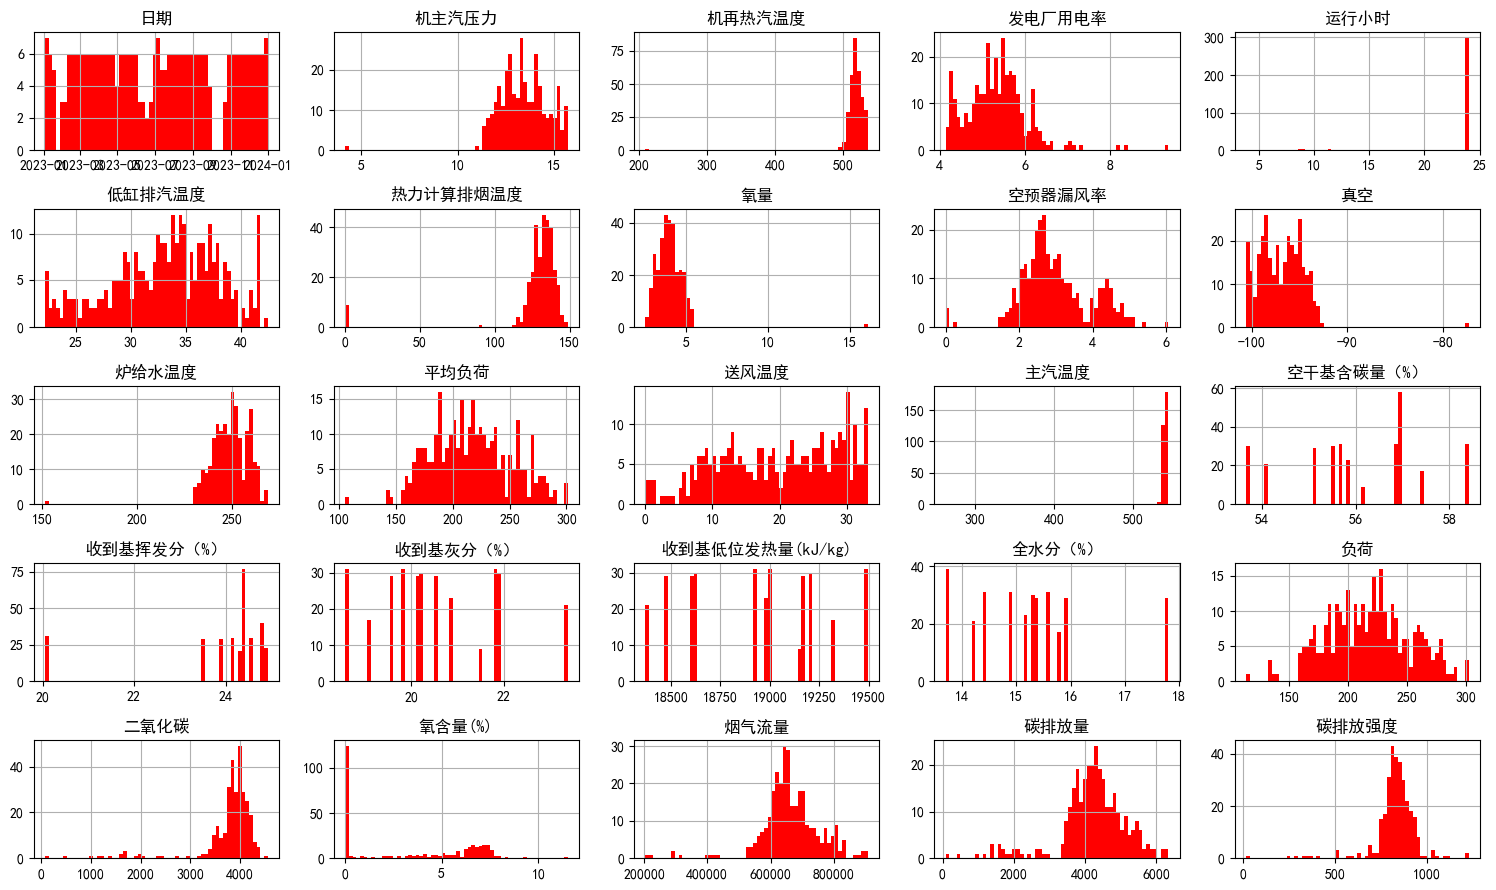

In [79]:
cleaned_df1.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

In [80]:
cleaned_df1[cleaned_df1["碳排放强度"]<600]

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
19,2023-01-20,15.65,533.63,5.96,11.31,41.57,0.00,4.81,3.87,-93.92,...,24.33,23.39,18369.70,14.2,133.890000,2062.19,0.000000,294253.775660,1664.41,509.493254
27,2023-01-28,15.65,533.63,6.60,8.78,41.57,0.00,4.81,2.67,-93.92,...,24.33,23.39,18369.70,14.2,133.890000,1574.04,0.000000,399817.252882,1672.95,512.119136
155,2023-06-05,13.86,522.87,5.77,24.00,35.73,135.40,3.69,3.16,-95.56,...,24.41,19.06,19317.70,15.8,233.485625,3830.70,5.157868,313713.202206,1972.58,405.509185
162,2023-06-12,12.37,509.72,6.45,24.00,32.57,137.67,4.24,2.90,-96.51,...,24.41,19.06,19317.70,15.8,182.141389,3777.67,5.187847,216713.104792,1391.83,294.663077
193,2023-07-13,14.44,523.63,5.08,24.00,38.64,142.12,3.19,2.95,-94.43,...,24.36,20.11,19177.30,15.4,261.255313,1947.84,0.000000,756151.040590,2269.37,340.094393
194,2023-07-14,13.19,513.01,5.49,24.00,36.97,138.68,3.83,3.14,-94.99,...,24.36,20.11,19177.30,15.4,220.187708,70.85,0.000000,775729.982118,85.72,13.487525
197,2023-07-17,13.18,516.67,5.60,24.00,36.13,136.12,3.78,2.31,-95.29,...,24.36,20.11,19177.30,15.4,210.270174,1599.65,0.000000,649185.764583,1579.76,364.785591
222,2023-08-11,14.07,526.93,5.41,24.00,41.29,141.24,3.20,3.26,-93.20,...,24.37,19.80,18997.53,15.6,245.121632,4177.12,4.135972,424237.637222,2941.54,513.887205
223,2023-08-12,14.28,528.15,5.45,24.00,41.47,140.69,3.17,3.01,-93.12,...,24.37,19.80,18997.53,15.6,247.365000,4183.68,2.326563,288015.288889,2068.83,321.159186
224,2023-08-13,13.62,522.87,5.58,24.00,40.87,135.62,3.49,3.24,-93.39,...,24.37,19.80,18997.53,15.6,229.206528,4065.51,1.957049,203852.132465,1381.73,248.147052


### 使用IQR方法去除异常值

In [81]:
# 1st quartile (25%)
Q1 = np.percentile(cleaned_df1["碳排放强度"], 25)
# 3rd quartile (75%)
Q3 = np.percentile(cleaned_df1["碳排放强度"],75)
# Interquartile range (IQR)
IQR = Q3 - Q1
# outlier step
outlier_step = 1.5 * IQR


In [82]:
df_out_1 = cleaned_df1[(cleaned_df1["碳排放强度"]>=Q1-outlier_step) & (cleaned_df1["碳排放强度"]<=Q3+outlier_step)]

In [83]:
df_out_1

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,24.33,23.39,18369.7,14.2,206.725734,3601.18,0.051923,693832.805839,4176.63,838.917627
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,24.33,23.39,18369.7,14.2,230.600729,3922.27,0.000000,727300.095556,4807.57,863.165329
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,24.33,23.39,18369.7,14.2,171.070951,3542.23,0.029894,626377.361937,3713.79,902.415743
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,24.33,23.39,18369.7,14.2,164.837187,3548.37,0.000000,608124.562014,3602.72,896.849022
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,24.33,23.39,18369.7,14.2,163.191714,3370.48,0.000000,621374.479464,3507.37,906.832620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,12.56,517.56,4.90,24.0,25.15,124.16,4.42,4.44,-99.70,...,24.77,18.57,19497.2,14.9,201.247993,3893.45,7.624859,668291.377958,4386.12,912.860320
361,2023-12-28,12.90,524.97,4.48,24.0,26.94,131.81,3.85,4.20,-99.35,...,24.77,18.57,19497.2,14.9,232.979375,4105.45,7.037431,710311.167257,4908.67,872.529605
362,2023-12-29,14.32,532.69,4.58,24.0,29.93,133.30,3.16,4.07,-98.70,...,24.77,18.57,19497.2,14.9,275.470769,4314.20,6.160070,773871.840315,5626.73,853.123715
363,2023-12-30,12.65,521.96,5.10,24.0,26.05,125.27,4.52,5.08,-99.52,...,24.77,18.57,19497.2,14.9,200.170285,3807.49,7.636619,645904.639253,4153.27,881.934531


In [84]:
# 1st quartile (25%)
Q1_2 = np.percentile(cleaned_df2["碳排放强度"], 25)
# 3rd quartile (75%)
Q3_2 = np.percentile(cleaned_df2["碳排放强度"],75)
# Interquartile range (IQR)
IQR_2 = Q3_2 - Q1_2
# outlier step
outlier_step_2 = 1.5 * IQR_2
df_out_2 = cleaned_df2[(cleaned_df2["碳排放强度"]>=Q1_2-outlier_step_2) & (cleaned_df2["碳排放强度"]<=Q3_2+outlier_step_2)]

In [85]:
df_out_2

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
59,2023-03-01,14.63,529.06,4.98,24.0,29.33,128.45,4.61,2.60,-97.68,...,25.01,21.86,18909.98,14.4,241.263403,4608.00,0.000000,603388.750000,4628.16,812.526404
60,2023-03-02,13.88,528.69,5.19,24.0,28.84,126.05,5.11,2.23,-97.71,...,25.01,21.86,18909.98,14.4,231.155903,4608.00,0.000000,603388.750000,4628.16,886.765055
61,2023-03-03,14.70,529.79,4.93,24.0,31.32,131.87,4.20,2.51,-97.15,...,25.01,21.86,18909.98,14.4,262.574931,4608.00,0.000000,603388.750000,4628.16,763.100747
62,2023-03-04,14.68,529.03,4.91,24.0,30.46,134.54,4.38,3.37,-97.36,...,25.01,21.86,18909.98,14.4,246.528211,4560.00,0.000000,603388.750000,4579.95,806.500736
64,2023-03-06,14.43,531.62,4.89,24.0,31.18,134.11,4.40,3.25,-97.13,...,25.01,21.86,18909.98,14.4,248.148021,4427.57,0.039028,603388.750000,4446.59,779.800138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,12.65,532.27,5.20,24.0,24.84,124.63,4.75,1.62,-99.40,...,24.76,18.39,19516.30,15.0,191.657544,3891.46,6.803649,558087.487754,3645.13,794.340575
361,2023-12-28,13.19,536.40,4.63,24.0,26.57,127.44,4.29,1.57,-99.07,...,24.76,18.39,19516.30,15.0,219.844826,4096.45,6.279340,597386.551007,4120.84,774.897876
362,2023-12-29,14.60,537.31,4.65,24.0,30.17,130.94,3.21,1.58,-98.35,...,24.76,18.39,19516.30,15.0,274.055629,4410.56,5.057797,661955.802413,4904.17,744.289131
363,2023-12-30,12.37,533.23,5.42,24.0,24.91,120.49,4.87,1.52,-99.34,...,24.76,18.39,19516.30,15.0,183.665231,3801.62,6.998612,545215.920712,3479.94,805.372623


In [86]:
# 1st quartile (25%)
Q1_3 = np.percentile(cleaned_df3["碳排放强度"], 25)
# 3rd quartile (75%)
Q3_3 = np.percentile(cleaned_df3["碳排放强度"],75)
# Interquartile range (IQR)
IQR_3 = Q3_3 - Q1_3
# outlier step
outlier_step_3 = 1.5 * IQR_3
df_out_3 = cleaned_df3[(cleaned_df3["碳排放强度"]>=Q1_3-outlier_step_3) & (cleaned_df3["碳排放强度"]<=Q3_3+outlier_step_3)]

In [87]:
df_out_3

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
110,2023-04-21,26.58,612.09,3.65,24.0,34.35,122.46,3.66,0.34,-94.91,...,24.44,20.84,18961.9,15.5,886.808889,2898.48,0.000000,1.799980e+06,8682.73,401.104358
111,2023-04-22,26.26,613.07,3.41,24.0,30.30,118.27,3.64,0.00,-96.34,...,24.44,20.84,18961.9,15.5,869.483611,2848.96,0.000000,1.732389e+06,8223.68,386.851204
112,2023-04-23,23.77,610.79,3.47,24.0,29.08,116.81,4.22,0.00,-96.87,...,24.44,20.84,18961.9,15.5,779.726736,2826.37,0.000000,1.575527e+06,7423.06,389.902523
113,2023-04-24,26.49,611.87,3.34,24.0,30.20,117.85,3.55,0.00,-96.93,...,24.44,20.84,18961.9,15.5,883.985139,2845.28,0.000000,1.784437e+06,8457.71,391.828884
114,2023-04-25,28.15,613.40,3.34,24.0,31.04,119.77,3.25,0.00,-96.36,...,24.44,20.84,18961.9,15.5,959.930712,2821.92,0.180961,1.971415e+06,9260.13,405.268717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.18,615.19,3.12,24.0,29.73,113.95,3.64,7.05,-97.82,...,24.76,14.96,20186.4,17.1,869.711250,2834.25,4.432951,1.673910e+06,7905.93,371.593445
361,2023-12-28,27.96,614.45,3.02,24.0,30.43,115.83,3.05,6.29,-97.56,...,24.76,14.96,20186.4,17.1,945.729028,2821.94,3.774826,1.765783e+06,8322.39,360.841710
362,2023-12-29,28.11,613.35,3.04,24.0,31.00,116.15,3.11,5.77,-96.99,...,24.76,14.96,20186.4,17.1,958.533007,2840.27,3.742483,1.796475e+06,8493.55,365.821446
363,2023-12-30,25.56,614.34,3.12,24.0,31.05,115.04,3.45,6.52,-96.55,...,24.76,14.96,20186.4,17.1,854.976303,2806.36,4.272289,1.566006e+06,7326.34,355.232213


In [88]:
# 1st quartile (25%)
Q1_4 = np.percentile(cleaned_df4["碳排放强度"], 25)
# 3rd quartile (75%)
Q3_4 = np.percentile(cleaned_df4["碳排放强度"],75)
# Interquartile range (IQR)
IQR_4 = Q3_4 - Q1_4
# outlier step
outlier_step_4 = 1.5 * IQR_4
df_out_4 = cleaned_df4[(cleaned_df4["碳排放强度"]>=Q1_4-outlier_step_4) & (cleaned_df4["碳排放强度"]<=Q3_4+outlier_step_4)]

In [89]:
df_out_4

,日期,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,二氧化碳,氧含量(%),烟气流量,碳排放量,碳排放强度
106,2023-04-17,25.07,612.65,NaN,8.8,41.18,129.58,4.07,18.60,-91.60,...,24.55,19.45,19446.5,15.7,637.658476,1276.57,0.000000,2.143530e+06,4523.24,1017.461298
107,2023-04-18,28.09,612.62,NaN,24.0,38.41,126.27,6.43,13.46,-92.53,...,24.55,19.45,19446.5,15.7,963.537847,4250.61,0.000000,2.597134e+06,18398.42,782.581184
108,2023-04-19,28.14,613.52,NaN,24.0,36.99,124.81,5.42,9.92,-93.14,...,24.55,19.45,19446.5,15.7,965.633438,3975.52,0.000000,2.608836e+06,17245.08,733.818299
109,2023-04-20,26.62,612.36,NaN,24.0,35.99,122.67,4.52,6.38,-93.56,...,24.55,19.45,19446.5,15.7,908.648715,3660.62,0.000000,2.510579e+06,15364.12,693.720350
110,2023-04-21,26.09,614.49,NaN,24.0,33.99,121.63,4.19,5.17,-94.33,...,24.55,19.45,19446.5,15.7,882.740903,3690.52,0.000000,2.447742e+06,15053.21,698.945059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,26.12,613.64,NaN,24.0,30.09,113.35,4.15,8.13,-97.92,...,24.76,14.96,20194.1,17.1,885.236197,4432.61,5.055493,2.259751e+06,16692.62,788.513341
361,2023-12-28,27.83,611.98,NaN,24.0,30.95,114.66,3.88,8.26,-97.67,...,24.76,14.96,20194.1,17.1,953.093993,4682.05,4.830139,2.316513e+06,18050.18,776.642777
362,2023-12-29,28.02,614.26,NaN,24.0,31.36,114.24,3.81,7.48,-97.53,...,24.76,14.96,20194.1,17.1,962.928834,4606.29,4.541731,2.321311e+06,17797.56,772.054221
363,2023-12-30,25.09,614.70,NaN,24.0,30.68,112.40,4.37,7.89,-97.85,...,24.76,14.96,20194.1,17.1,850.992135,4340.04,5.210249,2.216995e+06,16045.34,799.697391


In [181]:
len(df_out_1),len(df_out_2),len(df_out_3),len(df_out_4)

(288, 207, 234, 244)

## 1.6 数据集特征的分类排序处理

In [90]:
#按照电厂构成分类各个特征
# 1(日期) + 7（锅炉） + 6（汽轮机） + 3（发电） + 5（煤质） + 2（碳排放） + 1（运行） + 1（预测值碳排放强度）
# 定义每个模块的特征名称（根据你的实际特征名称进行修改）
boiler_features = ['炉给水温度', '送风温度', '氧量', '空预器漏风率', '热力计算排烟温度', '氧含量(%)', '烟气流量']
turbine_features = [ '主汽温度', '机主汽压力','机再热汽温度', '低缸排汽温度', '真空', '平均负荷']
power_features = ['负荷', '发电厂用电率','运行小时']
coal_features = ['空干基含碳量（%）', '收到基挥发分（%）', '收到基灰分（%）', '收到基低位发热量(kJ/kg)', '全水分（%）']
carbon_emission_features = ['二氧化碳', '碳排放量','碳排放强度']


sorted_columns = ["日期"] + boiler_features + turbine_features + power_features + coal_features + carbon_emission_features 
cleaned_df1 = df_out_1[sorted_columns]
cleaned_df2 = df_out_2[sorted_columns]
cleaned_df3 = df_out_3[sorted_columns]
cleaned_df4 = df_out_4[sorted_columns]

In [91]:
cleaned_df3

,日期,炉给水温度,送风温度,氧量,空预器漏风率,热力计算排烟温度,氧含量(%),烟气流量,主汽温度,机主汽压力,...,发电厂用电率,运行小时,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,二氧化碳,碳排放量,碳排放强度
110,2023-04-21,298.01,23.23,3.66,0.34,122.46,0.000000,1.799980e+06,598.94,26.58,...,3.65,24.0,53.28,24.44,20.84,18961.9,15.5,2898.48,8682.73,401.104358
111,2023-04-22,296.44,15.06,3.64,0.00,118.27,0.000000,1.732389e+06,598.93,26.26,...,3.41,24.0,53.28,24.44,20.84,18961.9,15.5,2848.96,8223.68,386.851204
112,2023-04-23,293.05,13.78,4.22,0.00,116.81,0.000000,1.575527e+06,597.99,23.77,...,3.47,24.0,53.28,24.44,20.84,18961.9,15.5,2826.37,7423.06,389.902523
113,2023-04-24,297.17,14.24,3.55,0.00,117.85,0.000000,1.784437e+06,598.20,26.49,...,3.34,24.0,53.28,24.44,20.84,18961.9,15.5,2845.28,8457.71,391.828884
114,2023-04-25,300.88,14.60,3.25,0.00,119.77,0.180961,1.971415e+06,598.16,28.15,...,3.34,24.0,53.28,24.44,20.84,18961.9,15.5,2821.92,9260.13,405.268717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,295.32,9.73,3.64,7.05,113.95,4.432951,1.673910e+06,598.08,26.18,...,3.12,24.0,60.14,24.76,14.96,20186.4,17.1,2834.25,7905.93,371.593445
361,2023-12-28,298.26,8.97,3.05,6.29,115.83,3.774826,1.765783e+06,598.39,27.96,...,3.02,24.0,60.14,24.76,14.96,20186.4,17.1,2821.94,8322.39,360.841710
362,2023-12-29,298.95,9.69,3.11,5.77,116.15,3.742483,1.796475e+06,597.71,28.11,...,3.04,24.0,60.14,24.76,14.96,20186.4,17.1,2840.27,8493.55,365.821446
363,2023-12-30,294.51,11.20,3.45,6.52,115.04,4.272289,1.566006e+06,598.61,25.56,...,3.12,24.0,60.14,24.76,14.96,20186.4,17.1,2806.36,7326.34,355.232213


In [92]:
cleaned_df4

,日期,炉给水温度,送风温度,氧量,空预器漏风率,热力计算排烟温度,氧含量(%),烟气流量,主汽温度,机主汽压力,...,发电厂用电率,运行小时,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,二氧化碳,碳排放量,碳排放强度
106,2023-04-17,289.79,34.22,4.07,18.60,129.58,0.000000,2.143530e+06,597.82,25.07,...,NaN,8.8,56.39,24.55,19.45,19446.5,15.7,1276.57,4523.24,1017.461298
107,2023-04-18,298.00,26.35,6.43,13.46,126.27,0.000000,2.597134e+06,599.97,28.09,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,4250.61,18398.42,782.581184
108,2023-04-19,298.11,25.07,5.42,9.92,124.81,0.000000,2.608836e+06,600.42,28.14,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,3975.52,17245.08,733.818299
109,2023-04-20,294.16,24.92,4.52,6.38,122.67,0.000000,2.510579e+06,599.44,26.62,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,3660.62,15364.12,693.720350
110,2023-04-21,292.58,21.73,4.19,5.17,121.63,0.000000,2.447742e+06,601.03,26.09,...,NaN,24.0,56.39,24.55,19.45,19446.5,15.7,3690.52,15053.21,698.945059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,290.10,9.51,4.15,8.13,113.35,5.055493,2.259751e+06,599.32,26.12,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4432.61,16692.62,788.513341
361,2023-12-28,294.74,8.47,3.88,8.26,114.66,4.830139,2.316513e+06,599.64,27.83,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4682.05,18050.18,776.642777
362,2023-12-29,295.43,9.27,3.81,7.48,114.24,4.541731,2.321311e+06,598.78,28.02,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4606.29,17797.56,772.054221
363,2023-12-30,287.45,11.49,4.37,7.89,112.40,5.210249,2.216995e+06,599.63,25.09,...,NaN,24.0,59.63,24.76,14.96,20194.1,17.1,4340.04,16045.34,799.697391


In [93]:
cleaned_df1.to_excel("cleaned_df1.xlsx")
cleaned_df2.to_excel("cleaned_df2.xlsx")
cleaned_df3.to_excel("cleaned_df3.xlsx")
cleaned_df4.to_excel("cleaned_df4.xlsx")

## 1.7 划分训练集和测试集

In [94]:
# 数据集中包含特征和目标变量，要把他们划分开
# 特征矩阵，不包含目标变量。df中去除碳排放强度列以外的列就是特征。
X1 = cleaned_df1.drop('碳排放强度', axis=1).drop('日期', axis=1)
# df的碳排放强度列是目标变量
y1 = cleaned_df1['碳排放强度']

In [95]:
from sklearn.model_selection import train_test_split
#划分训练集和测试集，将数据集分为训练集（80%）和测试集（20%）
# test_size=0.2 这个参数就代表20%的样本做测试集
# random_state参数设置随机数种子，保证每次切分运行结果一致。
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [96]:
X2 = cleaned_df2.drop('碳排放强度', axis=1).drop('日期', axis=1)
# df的碳排放强度列是目标变量
y2 = cleaned_df2['碳排放强度']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [97]:
X3 = cleaned_df3.drop('碳排放强度', axis=1).drop('日期', axis=1)
# df的碳排放强度列是目标变量
y3 = cleaned_df3['碳排放强度']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

X4 = cleaned_df4.drop('碳排放强度', axis=1).drop('日期', axis=1)
# df的碳排放强度列是目标变量
y4 = cleaned_df4['碳排放强度']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# 2. 特征工程

## 2.1 特征趋势可视化

In [98]:
#可视化各特征趋势和关系
values = cleaned_df1.values
# specify columns to plot
groups = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
i = 1
# 调整图像大小
plt.figure(figsize=(15, 25))  # 增加图像大小，宽15，高25
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df_out.columns[group], y=0.5, loc='right')
	i += 1
# 自动调整子图之间的间距
plt.tight_layout()
plt.show()

## 2.2 特征相关性分析

In [99]:
cleaned_df1

,日期,炉给水温度,送风温度,氧量,空预器漏风率,热力计算排烟温度,氧含量(%),烟气流量,主汽温度,机主汽压力,...,发电厂用电率,运行小时,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,二氧化碳,碳排放量,碳排放强度
3,2023-01-04,245.99,7.87,4.39,2.40,119.69,0.051923,693832.805839,540.04,12.30,...,4.92,24.0,54.08,24.33,23.39,18369.7,14.2,3601.18,4176.63,838.917627
4,2023-01-05,250.55,9.60,4.05,3.02,123.48,0.000000,727300.095556,539.85,13.71,...,4.63,24.0,54.08,24.33,23.39,18369.7,14.2,3922.27,4807.57,863.165329
5,2023-01-06,235.06,11.26,5.13,3.36,122.51,0.029894,626377.361937,542.23,11.87,...,5.50,24.0,54.08,24.33,23.39,18369.7,14.2,3542.23,3713.79,902.415743
6,2023-01-07,233.02,12.07,5.11,2.58,125.56,0.000000,608124.562014,543.10,11.52,...,5.56,24.0,54.08,24.33,23.39,18369.7,14.2,3548.37,3602.72,896.849022
7,2023-01-08,232.48,13.16,5.31,2.71,127.30,0.000000,621374.479464,541.95,11.39,...,7.03,24.0,54.08,24.33,23.39,18369.7,14.2,3370.48,3507.37,906.832620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,243.15,8.88,4.42,4.44,124.16,7.624859,668291.377958,540.61,12.56,...,4.90,24.0,58.41,24.77,18.57,19497.2,14.9,3893.45,4386.12,912.860320
361,2023-12-28,248.31,8.82,3.85,4.20,131.81,7.037431,710311.167257,543.43,12.90,...,4.48,24.0,58.41,24.77,18.57,19497.2,14.9,4105.45,4908.67,872.529605
362,2023-12-29,260.38,9.04,3.16,4.07,133.30,6.160070,773871.840315,543.74,14.32,...,4.58,24.0,58.41,24.77,18.57,19497.2,14.9,4314.20,5626.73,853.123715
363,2023-12-30,243.36,11.21,4.52,5.08,125.27,7.636619,645904.639253,543.24,12.65,...,5.10,24.0,58.41,24.77,18.57,19497.2,14.9,3807.49,4153.27,881.934531


In [100]:
correlation_matrix = cleaned_df1.iloc[:, 1:].corr()#除日期列
correlation_matrix2 = cleaned_df1.iloc[:, 1:].corr()

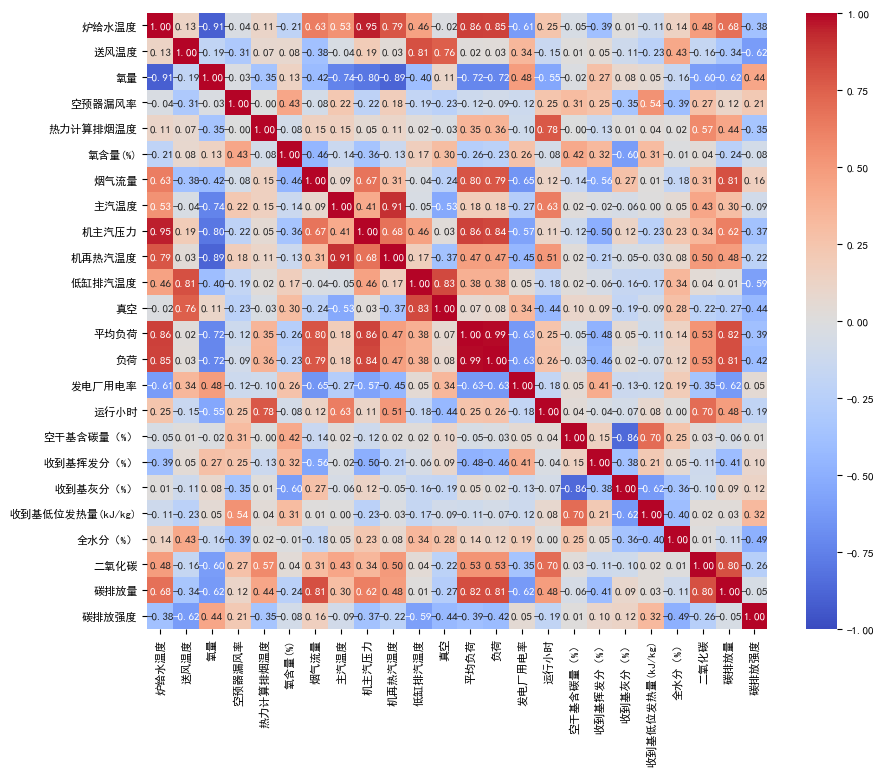

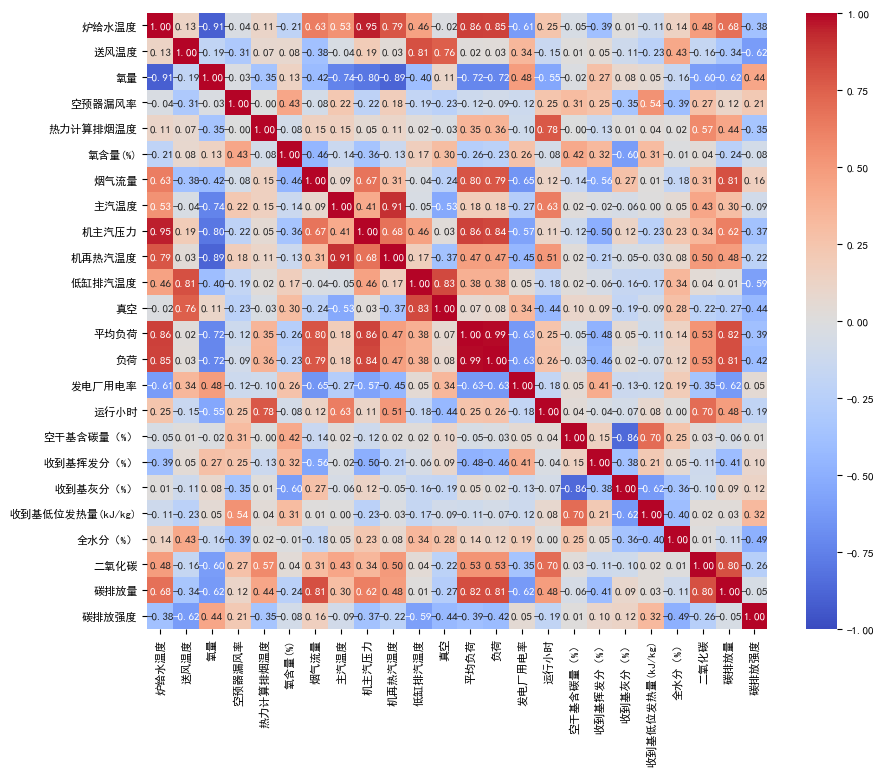

In [101]:
import seaborn as sns
# 函数绘制相关性热力图
def show_heatmap(correlation_matrix):
    # Set the size of the heatmap
    plt.figure(figsize=(10, 8))
    plt.rcParams.update({'font.size': 8})
    # Draw the heatmap
    sns_plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)  
    # Set the title and labels
    # Show the plot
    plt.show()
    sns_plot.figure.savefig("Correlation Heatmap.png",dpi=500,bbox_inches='tight')
show_heatmap(correlation_matrix)
show_heatmap(correlation_matrix2)

In [102]:
# 按特定特征的相关性进行排序，例如按第一列的相关性
target_feature = '碳排放强度'  # 将此替换为你要排序的特征名
# 获取该特征与其他特征的相关系数，按绝对值排序
sorted_correlations = correlation_matrix[target_feature].abs().sort_values(ascending=False)
# 打印排序后的结果
print(sorted_correlations)

碳排放强度              1.000000
送风温度               0.616280
低缸排汽温度             0.591928
全水分（%）             0.492964
真空                 0.436399
氧量                 0.435636
负荷                 0.417400
平均负荷               0.387802
炉给水温度              0.378263
机主汽压力              0.369746
热力计算排烟温度           0.350932
收到基低位发热量(kJ/kg)    0.321810
二氧化碳               0.256414
机再热汽温度             0.219028
空预器漏风率             0.211282
运行小时               0.193866
烟气流量               0.156604
收到基灰分（%）           0.123389
收到基挥发分（%）          0.096399
主汽温度               0.086406
氧含量(%)             0.083241
碳排放量               0.054450
发电厂用电率             0.050695
空干基含碳量（%）          0.012422
Name: 碳排放强度, dtype: float64


# 3.模型训练

## 线性回归

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# 创建线性回归模型
linear_model = LinearRegression()

# 拟合模型
linear_model.fit(X1_train, y1_train)

# 在测试集上进行预测
linear_y1_pred = linear_model.predict(X1_test)

linear_mse = mean_squared_error(y1_test, linear_y1_pred)
linear_rmse = np.sqrt(linear_mse)  # Calculating RMSE
linear_mae = mean_absolute_error(y1_test, linear_y1_pred)
linear_mape = mean_absolute_percentage_error(y1_test, linear_y1_pred) 
linear_r2 = r2_score(y1_test,linear_y1_pred)

# 输出结果
print(f"linear_MSE: {linear_mse:.6f}")
print(f"linear_RMSE: {linear_rmse:.6f}")
print(f"linear_MAE: {linear_mae:.6f}")
print(f"linear_MAPE: {linear_mape*100:.6f}")
print(f"linear_R Square: {linear_r2:.6f}")
print(f"回归系数: {linear_model.coef_}")
print(f"截距: {linear_model.intercept_}")

linear_MSE: 200.239546
linear_RMSE: 14.150602
linear_MAE: 10.808778
linear_MAPE: 1.273793
linear_R Square: 0.937370
回归系数: [-4.95728371e+00 -5.43206020e-01 -5.08722595e+01  3.50785609e+00
 -1.10644109e+00  1.50849750e+00  4.52001200e-04  6.24760074e-01
  4.31270709e-01 -3.94210382e-01 -1.68915080e+00  7.47615767e+00
  2.05629261e+00 -4.20659405e+00 -1.83562160e+00 -6.52928545e-01
 -3.02511226e+00  4.59537726e+00 -1.71205688e+00  2.29143718e-02
 -7.35055753e-01 -1.03831539e-01  1.08151301e-01]
截距: 2857.440249539868


In [104]:

# 创建线性回归模型
linear_model2 = LinearRegression()

# 拟合模型
linear_model2.fit(X2_train, y2_train)

# 在测试集上进行预测
linear_y2_pred = linear_model2.predict(X2_test)

linear_mse2 = mean_squared_error(y2_test, linear_y2_pred)
linear_rmse2 = np.sqrt(linear_mse2)  # Calculating RMSE
linear_mae2 = mean_absolute_error(y2_test, linear_y2_pred)
linear_mape2 = mean_absolute_percentage_error(y2_test, linear_y2_pred) 
linear_r22 = r2_score(y2_test,linear_y2_pred)

# 输出结果
print(f"linear_MSE: {linear_mse2:.6f}")
print(f"linear_RMSE: {linear_rmse2:.6f}")
print(f"linear_MAE: {linear_mae2:.6f}")
print(f"linear_MAPE: {linear_mape2*100:.6f}")
print(f"linear_R Square: {linear_r22:.6f}")
print(f"回归系数: {linear_model2.coef_}")
print(f"截距: {linear_model2.intercept_}")

linear_MSE: 417.075370
linear_RMSE: 20.422423
linear_MAE: 15.381437
linear_MAPE: 2.010562
linear_R Square: 0.698184
回归系数: [ 3.65634269e+00 -9.07375842e-02  1.73959634e+01 -1.68469475e+00
 -2.52496502e-01 -2.92263274e+00  4.13459715e-05  2.77823091e+00
 -6.64582101e-01 -2.15405938e+00 -3.97590292e+00  9.29387574e+00
  3.08783426e-01 -2.68765130e+00 -1.13294186e+01  2.81127926e+00
  6.31067844e+00 -1.62259294e+01  5.74315247e+00 -2.04177294e-02
  2.60899844e+00 -8.80965447e-02  1.07217005e-01]
截距: 1241.0418532050203


## 3.1 随机森林（Random Forest，RF）

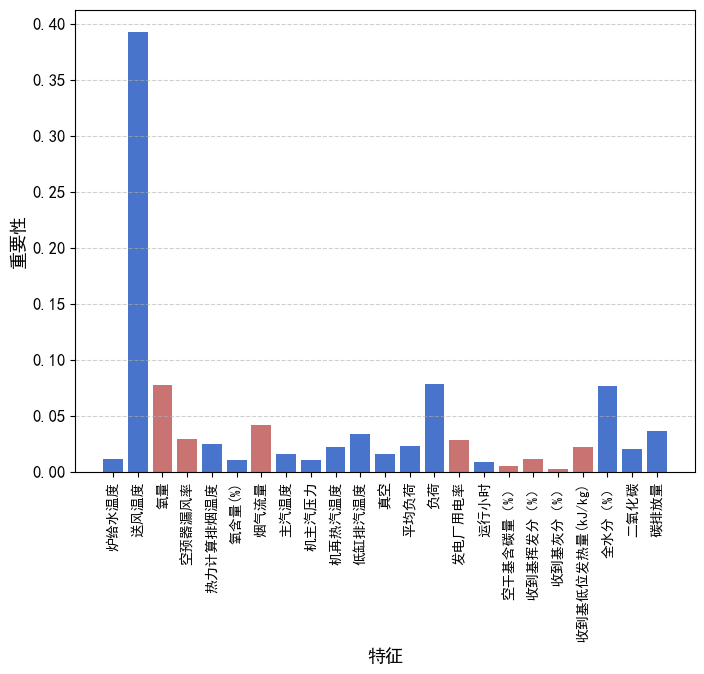

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X1_train, y1_train)
# Predict on the test set
rf_y1_pred = rf_model.predict(X1_test)
# Evaluate the model
rf_mse = mean_squared_error(y1_test, rf_y1_pred)
rf_rmse = np.sqrt(rf_mse)  # Calculating RMSE
rf_mae = mean_absolute_error(y1_test, rf_y1_pred)
rf_mape = mean_absolute_percentage_error(y1_test, rf_y1_pred) 
rf_r2 = r2_score(y1_test, rf_y1_pred)
feature_importances = rf_model.feature_importances_
feature_names = X1.columns
# 计算特征与目标变量的相关系数
correlations =correlation_matrix['碳排放强度'].drop('碳排放强度')
# 可视化特征重要性和相关性
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
plt.xticks(fontsize=10, rotation=90,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("特征",fontsize = 13,fontweight='bold')
plt.ylabel("重要性",fontsize = 13,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("rf1_corr.png",dpi=500,bbox_inches='tight')

In [106]:
print(f"rf_MSE: {rf_mse:.6f}")
print(f"rf_RMSE: {rf_rmse:.6f}")
print(f"rf_MAE: {rf_mae:.6f}")
print(f"rf_MAPE: {rf_mape*100:.6f}")
print(f"rf_R Square: {rf_r2:.6f}")

rf_MSE: 690.648042
rf_RMSE: 26.280183
rf_MAE: 20.742505
rf_MAPE: 2.430797
rf_R Square: 0.783983


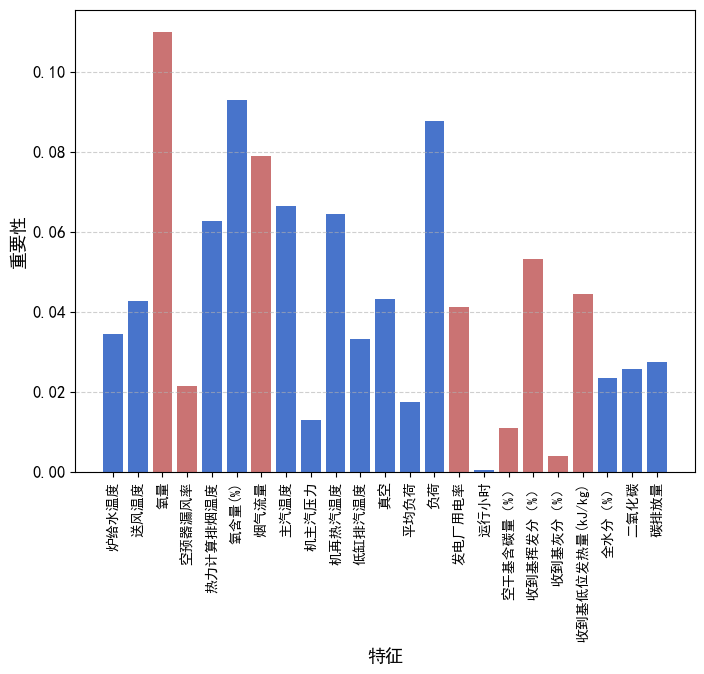

In [107]:
# Train the Random Forest model
rf_model2 = RandomForestRegressor(random_state=42)
rf_model2.fit(X2_train, y2_train)
# Predict on the test set
rf_y2_pred = rf_model2.predict(X2_test)
# Evaluate the model
rf_mse2 = mean_squared_error(y2_test, rf_y2_pred)
rf_rmse2 = np.sqrt(rf_mse2)  # Calculating RMSE
rf_mae2 = mean_absolute_error(y2_test, rf_y2_pred)
rf_mape2 = mean_absolute_percentage_error(y2_test, rf_y2_pred) 
rf_r22 = r2_score(y2_test, rf_y2_pred)
feature_importances2 = rf_model2.feature_importances_
feature_names2 = X2.columns
# 计算特征与目标变量的相关系数
correlations2 =correlation_matrix2['碳排放强度'].drop('碳排放强度')
# 可视化特征重要性和相关性
plt.figure(figsize=(8, 6))
plt.bar(feature_names2, feature_importances2, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
plt.xticks(fontsize=10, rotation=90,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("特征",fontsize = 13,fontweight='bold')
plt.ylabel("重要性",fontsize = 13,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("rf2_corr.png",dpi=500,bbox_inches='tight')

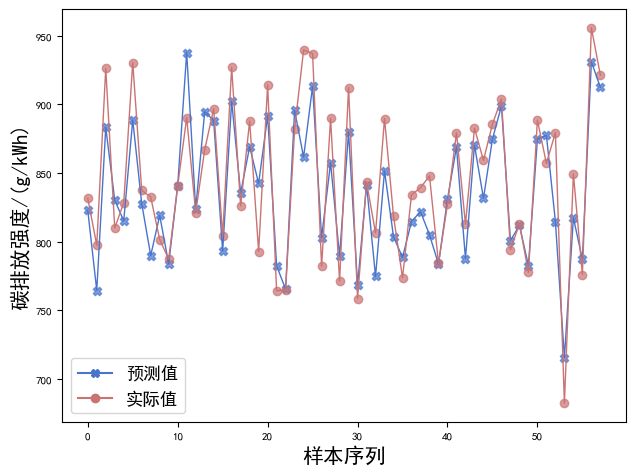

In [108]:
#rf 机组1 测试集
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # 导入 mlines
# 绘制test data预测值和真实值
plt.plot(rf_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(rf_y1_pred)), rf_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("rf1.png",dpi=500,bbox_inches='tight')
plt.show()


In [109]:
print(f"rf_MSE: {rf_mse2:.6f}")
print(f"rf_RMSE: {rf_rmse2:.6f}")
print(f"rf_MAE: {rf_mae2:.6f}")
print(f"rf_MAPE: {rf_mape2*100:.6f}")
print(f"rf_R Square: {rf_r22:.6f}")

rf_MSE: 1025.892676
rf_RMSE: 32.029559
rf_MAE: 20.525995
rf_MAPE: 2.645449
rf_R Square: 0.257614


## 预测 VS 真实

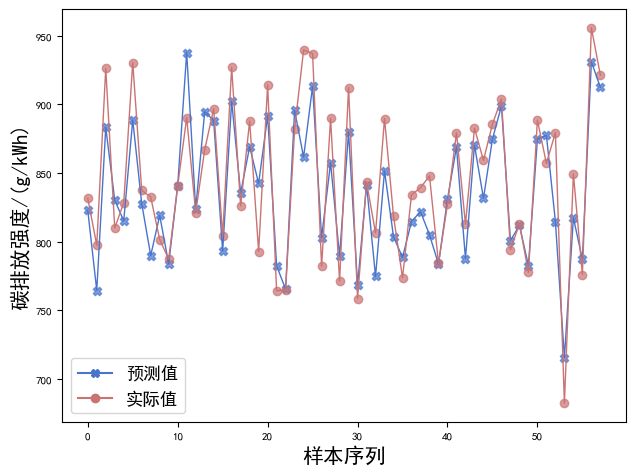

In [110]:
#rf 机组1 测试集
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # 导入 mlines
# 绘制test data预测值和真实值
plt.plot(rf_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(rf_y1_pred)), rf_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("rf1.png",dpi=500,bbox_inches='tight')
plt.show()


In [111]:
#xgb 机组1 测试集
# 绘制test data预测值和真实值
plt.plot(xgb_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(xgb_y1_pred)), xgb_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("xgb1.png",dpi=500,bbox_inches='tight')
plt.show()


NameError: name 'xgb_y1_pred' is not defined

In [ ]:
# 绘制test data预测值和真实值
plt.plot(svm_y_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(svm_y_pred)), svm_y_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("svm1.png",dpi=500,bbox_inches='tight')
plt.show()


In [ ]:
# 绘制test data预测值和真实值
plt.plot(lstm_y_pred_rescaled, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y_test_rescaled, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(lstm_y_pred_rescaled)), lstm_y_pred_rescaled, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y_test_rescaled)), y_test_rescaled, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("lstm1.png",dpi=500,bbox_inches='tight')
plt.show()


## 3.2 XGBoost

In [112]:
from xgboost import XGBRegressor
# 初始化XGBoost回归器
xgb_model = XGBRegressor(
    n_estimators=300,        # 树的数量
    max_depth=3,             # 树的最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 每棵树使用的样本比例
    colsample_bytree=0.8,    # 每棵树使用的特征比例
    random_state=42
)
# 训练模型
xgb_model.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [113]:
# from xgboost import XGBRegressor
# # 初始化XGBoost回归器
# xgb2_model = XGBRegressor(
#     n_estimators=300,        # 树的数量
#     max_depth=3,             # 树的最大深度
#     learning_rate=0.1,       # 学习率
#     subsample=0.8,           # 每棵树使用的样本比例
#     colsample_bytree=0.8,    # 每棵树使用的特征比例
#     random_state=42
# )
# # 训练模型
# xgb2_model.fit(X1_train.iloc[:, :-1], y1_train)
#xgb2_model.predict([X1_train.iloc[0][0:-1].values])

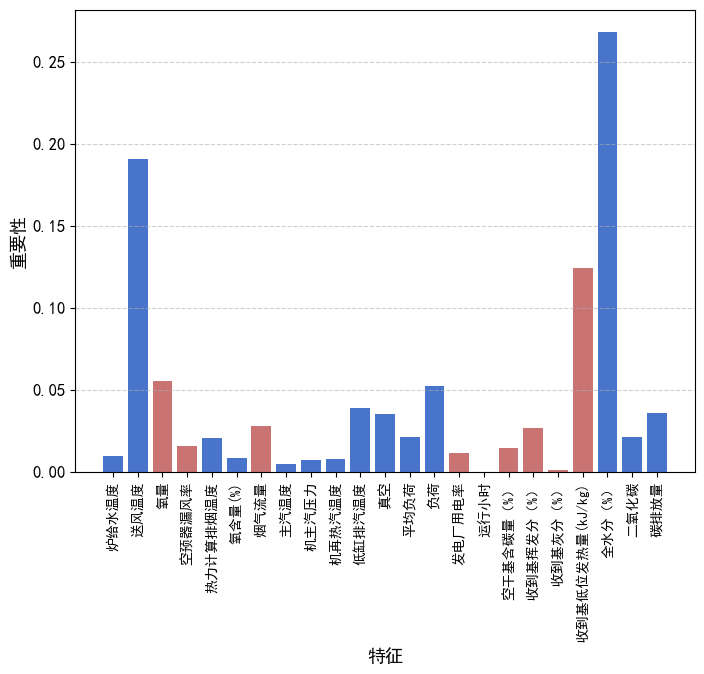

In [114]:
from matplotlib.font_manager import FontProperties
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
# Predict on the test set
xgb_y1_pred =  xgb_model.predict(X1_test)
# Evaluate the model
xgb_mse = mean_squared_error(y1_test, xgb_y1_pred)
xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
xgb_mae = mean_absolute_error(y1_test, xgb_y1_pred)
xgb_mape = mean_absolute_percentage_error(y1_test, xgb_y1_pred) 
xgb_r2 = r2_score(y1_test, xgb_y1_pred)
# 特征重要性
feature_importances = xgb_model.feature_importances_
# 可视化特征重要性和相关性
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances, color=np.where(correlations > 0, '#CA7373', '#4874CB'))
plt.xticks(fontsize=10, rotation=90,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.xlabel("特征",fontsize = 13)
plt.ylabel("重要性",fontsize = 13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("xgb1_corr.png",dpi=500,bbox_inches='tight')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20068\1226435494.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_correlations = correlations[sorted_idx]  # 排序后的相关性


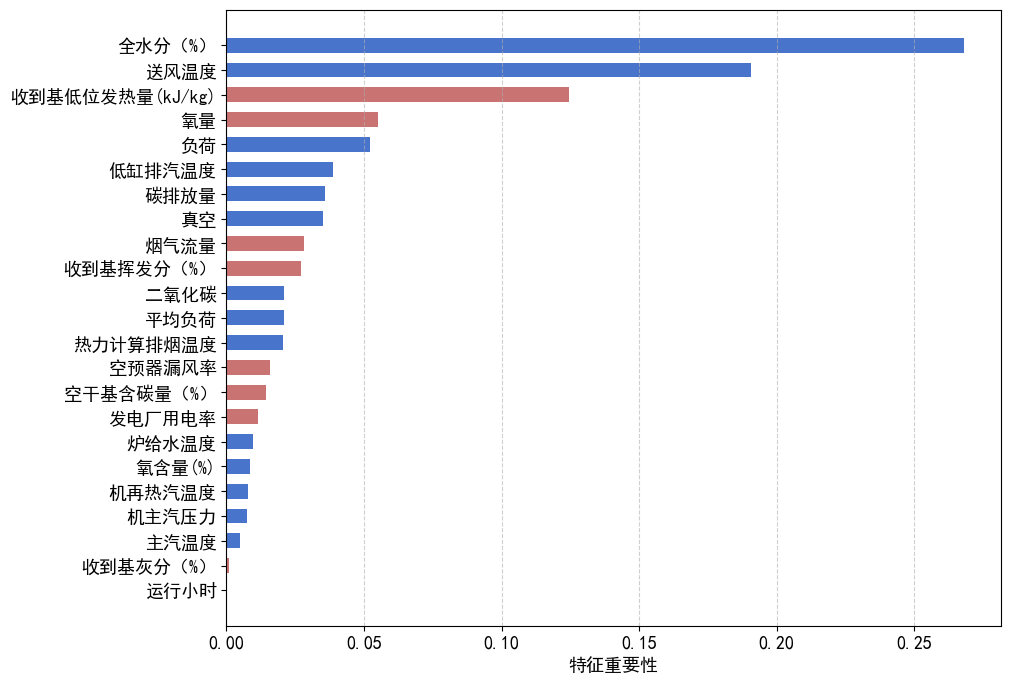

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# 假设correlations数组已存在，它表示每个特征的相关性
# 按特征重要性排序
sorted_idx = np.argsort(feature_importances)  # 获取按重要性排序的索引
sorted_feature_names = np.array(feature_names)[sorted_idx]  # 排序后的特征名
sorted_feature_importances = feature_importances[sorted_idx]  # 排序后的特征重要性
sorted_correlations = correlations[sorted_idx]  # 排序后的相关性


# 可视化特征重要性和正反相关性
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_feature_names, sorted_feature_importances,height = 0.6,
                color=np.where(sorted_correlations > 0, '#CA7373', '#4874CB'))

# 设置y轴标签的字体粗细
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.xlabel("特征重要性", fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig("feature.png",dpi=1200,bbox_inches='tight')
plt.show()


In [116]:
print(f"xgb_MSE: {xgb_mse:.6f}")
print(f"xgb_RMSE: {xgb_rmse:.6f}")
print(f"xgb_MAE: {xgb_mae:.6f}")
print(f"xgb_MAPE: {xgb_mape*100:.6f}")
print(f"xgb_R Square: {xgb_r2:.6f}")

xgb_MSE: 439.985728
xgb_RMSE: 20.975837
xgb_MAE: 16.668370
xgb_MAPE: 1.954908
xgb_R Square: 0.862384


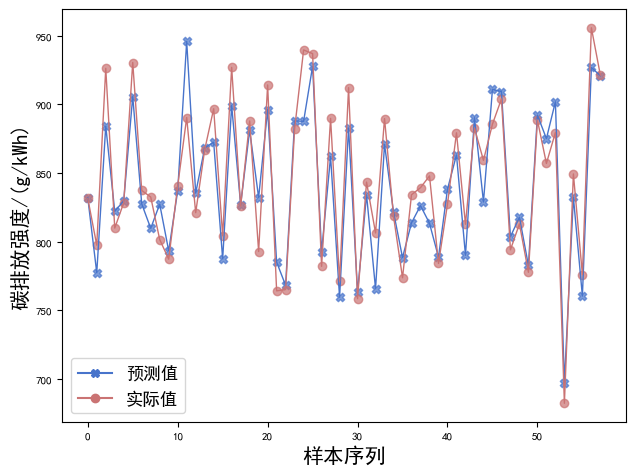

In [117]:
#xgb 机组1 测试集
# 绘制test data预测值和真实值
plt.plot(xgb_y1_pred, label='预测值', linewidth=1,color = "#4874CB")       # 添加预测值的标签
plt.plot(y1_test.values, label='实际值', linewidth=1, color='#CA7373')  # 添加真实值的标签
# 绘制test data的预测值和真实值
plt.scatter(range(len(xgb_y1_pred)), xgb_y1_pred, label='预测值',  alpha=0.7,marker= "X",color = "#4874CB")  # 绘制预测值的散点图
plt.scatter(range(len(y1_test)), y1_test.values, label='实际值', alpha=0.7, color='#CA7373')  # 绘制真实值的散点图
# 创建自定义的图例（线+点）
line1 = mlines.Line2D([], [], color="#4874CB", marker="X", markersize=6, label="预测值")
line2 = mlines.Line2D([], [], color="#CA7373", marker="o", markersize=6, label="实际值")

# 显示图例
plt.legend(handles=[line1, line2], fontsize=12.5)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("xgb1.png",dpi=500,bbox_inches='tight')
plt.show()


In [118]:
from xgboost import XGBRegressor
# 初始化XGBoost回归器
xgb_model2 = XGBRegressor(
    n_estimators=400,        # 树的数量
    max_depth=3,             # 树的最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 每棵树使用的样本比例
    colsample_bytree=0.8,    # 每棵树使用的特征比例
    random_state=42
)
# 训练模型
xgb_model2.fit(X2_train, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [139]:
from xgboost import XGBRegressor
# 初始化XGBoost回归器
xgb_model3 = XGBRegressor(
    n_estimators=400,        # 树的数量
    max_depth=3,             # 树的最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 每棵树使用的样本比例
    colsample_bytree=0.8,    # 每棵树使用的特征比例
    random_state=42
)
# 训练模型
xgb_model3.fit(X3_train, y3_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [158]:
from xgboost import XGBRegressor
# 初始化XGBoost回归器
xgb_model4 = XGBRegressor(
    n_estimators=400,        # 树的数量
    max_depth=3,             # 树的最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 每棵树使用的样本比例
    colsample_bytree=0.8,    # 每棵树使用的特征比例
    random_state=42
)
# 训练模型
xgb_model4.fit(X4_train, y4_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [141]:
xgb_y3_pred = xgb_model3.predict(X3_test)#42 records
get_error(y3_test,xgb_y3_pred)

xgb_MSE: 82.909469
xgb_RMSE: 9.105464
xgb_MAE: 6.962464
xgb_MAPE: 1.938696
xgb_R Square: 0.832957


In [159]:
xgb_y4_pred = xgb_model4.predict(X4_test)#42 records
get_error(y4_test,xgb_y4_pred)

xgb_MSE: 474.672835
xgb_RMSE: 21.786988
xgb_MAE: 16.083711
xgb_MAPE: 2.205406
xgb_R Square: 0.866081


In [137]:
def get_error(actual,predict):
    # Evaluate the model
    xgb_mse = mean_squared_error(actual, predict)
    xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
    xgb_mae = mean_absolute_error(actual, predict)
    xgb_mape = mean_absolute_percentage_error(actual, predict) 
    xgb_r2 = r2_score(actual, predict)
    print(f"xgb_MSE: {xgb_mse:.6f}")
    print(f"xgb_RMSE: {xgb_rmse:.6f}")
    print(f"xgb_MAE: {xgb_mae:.6f}")
    print(f"xgb_MAPE: {xgb_mape*100:.6f}")
    print(f"xgb_R Square: {xgb_r2:.6f}")

In [138]:
xgb_y2_pred = xgb_model2.predict(X2_test)#42 records
get_error(y2_test,xgb_y2_pred)

xgb_MSE: 719.942763
xgb_RMSE: 26.831749
xgb_MAE: 15.412890
xgb_MAPE: 1.992055
xgb_R Square: 0.479014


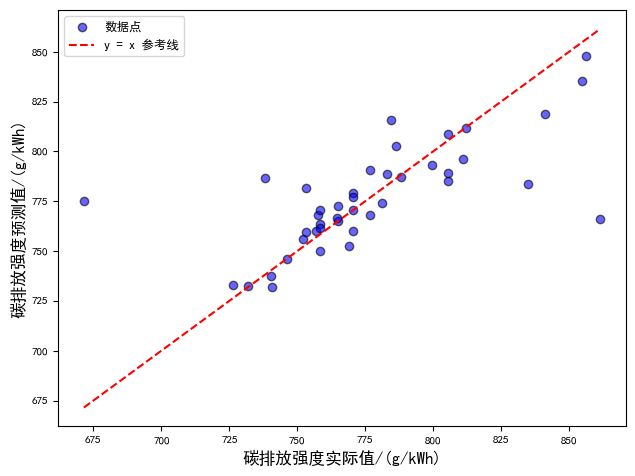

In [121]:
xgb_y2_pred = xgb_model2.predict(X2_test)#42 records

# Evaluate the model
xgb_mse = mean_squared_error(y1_test, xgb_y1_pred)
xgb_rmse = np.sqrt(xgb_mse)  # Calculating RMSE
xgb_mae = mean_absolute_error(y1_test, xgb_y1_pred)
xgb_mape = mean_absolute_percentage_error(y1_test, xgb_y1_pred) 
xgb_r2 = r2_score(y1_test, xgb_y1_pred)

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y2_test, xgb_y2_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y2_test.max(), xgb_y2_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y2_test.min(), xgb_y2_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
#plt.savefig('预测值与实际值的吻合度.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


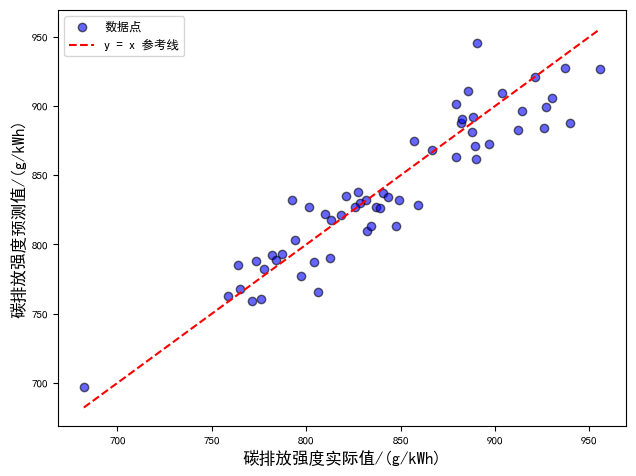

In [122]:
xgb_y1_pred = xgb_model.predict(X1_test)
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度3.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

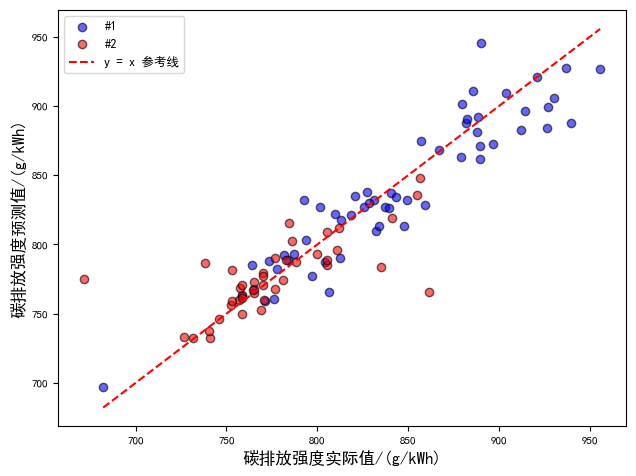

In [123]:
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='#1')
plt.scatter(y2_test, xgb_y2_pred, color='red', alpha=0.6, edgecolor='k', label='#2')
# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
#plt.savefig('预测值与实际值的吻合度2.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 和 y2_test 是实际值，xgb_y1_pred 和 xgb_y2_pred 是对应的预测值

# 计算线性回归拟合系数
def linear_fit(y_test, y_pred):
    z = np.polyfit(y_test, y_pred, 1)  # 线性拟合
    p = np.poly1d(z)  # 得到拟合的多项式函数
    y_fit = p(y_test)  # 计算拟合值
    residuals = y_pred - y_fit  # 计算残差
    std_err = np.std(residuals)  # 计算标准误差
    confidence_interval = 1.96 * std_err  # 95%置信区间
    return y_fit, confidence_interval

# 机组#1的拟合和置信区间
y1_fit, y1_confidence_interval = linear_fit(y1_test, xgb_y1_pred)

# 机组#2的拟合和置信区间
y2_fit, y2_confidence_interval = linear_fit(y2_filtered, xgb_y2_filtered)

# 使用 pandas DataFrame 排序
data1 = pd.DataFrame({'y_test': y1_test, 'y_pred': xgb_y1_pred, 'y_fit': y1_fit})
data2 = pd.DataFrame({'y_test': y2_filtered, 'y_pred': xgb_y2_filtered, 'y_fit': y2_fit})

# 按 'y_test' 升序排序
data1_sorted = data1.sort_values(by='y_test')
data2_sorted = data2.sort_values(by='y_test')

# 提取排序后的值
sorted_y1_test = data1_sorted['y_test'].values
sorted_xgb_y1_pred = data1_sorted['y_pred'].values
sorted_y1_fit = data1_sorted['y_fit'].values

sorted_y2_test = data2_sorted['y_test'].values
sorted_xgb_y2_pred = data2_sorted['y_pred'].values
sorted_y2_fit = data2_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y1_test, sorted_xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='#1 机组')
plt.scatter(sorted_y2_test, sorted_xgb_y2_pred, color='red', alpha=0.6, edgecolor='k', label='#2 机组')

# 绘制拟合线
plt.plot(sorted_y1_test, sorted_y1_fit, color='orange', alpha=0.6, label=f"#1 拟合线\n$R^2$ = {np.corrcoef(sorted_y1_test, sorted_xgb_y1_pred)[0,1]**2:.2f}")
plt.plot(sorted_y2_test, sorted_y2_fit, color='green', alpha=0.6, label=f"#2 拟合线\n$R^2$ = {np.corrcoef(sorted_y2_test, sorted_xgb_y2_pred)[0,1]**2:.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y1_test, sorted_y1_fit - y1_confidence_interval, sorted_y1_fit + y1_confidence_interval, color='orange', alpha=0.1, label='#1 95%置信区间')
plt.fill_between(sorted_y2_test, sorted_y2_fit - y2_confidence_interval, sorted_y2_fit + y2_confidence_interval, color='green', alpha=0.1, label='#2 95%置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y1_test.max(), sorted_xgb_y1_pred.max(), sorted_y2_test.max(), sorted_xgb_y2_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y1_test.min(), sorted_xgb_y1_pred.min(), sorted_y2_test.min(), sorted_xgb_y2_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较（机组#1与机组#2）")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_机组1与机组2.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


NameError: name 'y2_filtered' is not defined

In [125]:
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_pred_, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1.max(), xgb_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1.min(), xgb_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


NameError: name 'xgb_pred_' is not defined

## 关系图

In [126]:
X1_test.columns

Index(['炉给水温度', '送风温度', '氧量', '空预器漏风率', '热力计算排烟温度', '氧含量(%)', '烟气流量', '主汽温度',
       '机主汽压力', '机再热汽温度', '低缸排汽温度', '真空', '平均负荷', '负荷', '发电厂用电率', '运行小时',
       '空干基含碳量（%）', '收到基挥发分（%）', '收到基灰分（%）', '收到基低位发热量(kJ/kg)', '全水分（%）',
       '二氧化碳', '碳排放量'],
      dtype='object')

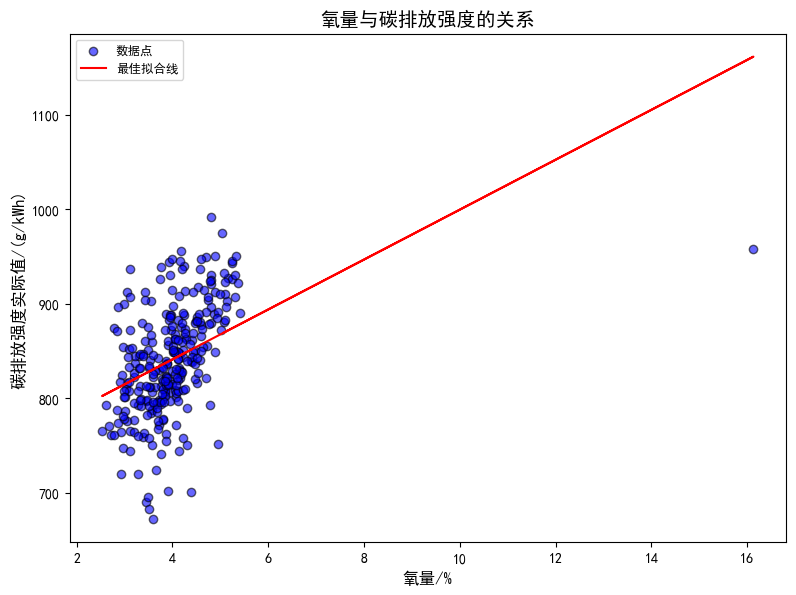

In [127]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 假设 X1 和 y1 是包含氧量和碳排放强度的列

# 创建一个单独的图
plt.figure(figsize=(8, 6))

# 绘制氧量与碳排放强度的散点图
plt.scatter(X1['氧量'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 计算最佳拟合线
slope, intercept, _, _, _ = linregress(X1['氧量'], y1)

# 绘制最佳拟合线
plt.plot(X1['氧量'], slope * X1['氧量'] + intercept, color='red', label='最佳拟合线')

# 设置标签和标题
plt.xlabel("氧量/%", fontsize=12)
plt.ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.title("氧量与碳排放强度的关系", fontsize=14)
plt.legend(fontsize=9)

# 设置坐标轴刻度
plt.tick_params(axis='both', which='major', labelsize=10)

# 显示图表
plt.tight_layout()

# 保存图像
plt.savefig('氧量与碳排放强度关系.png', dpi=1200, bbox_inches='tight')  # 保存为PNG图像
plt.show()


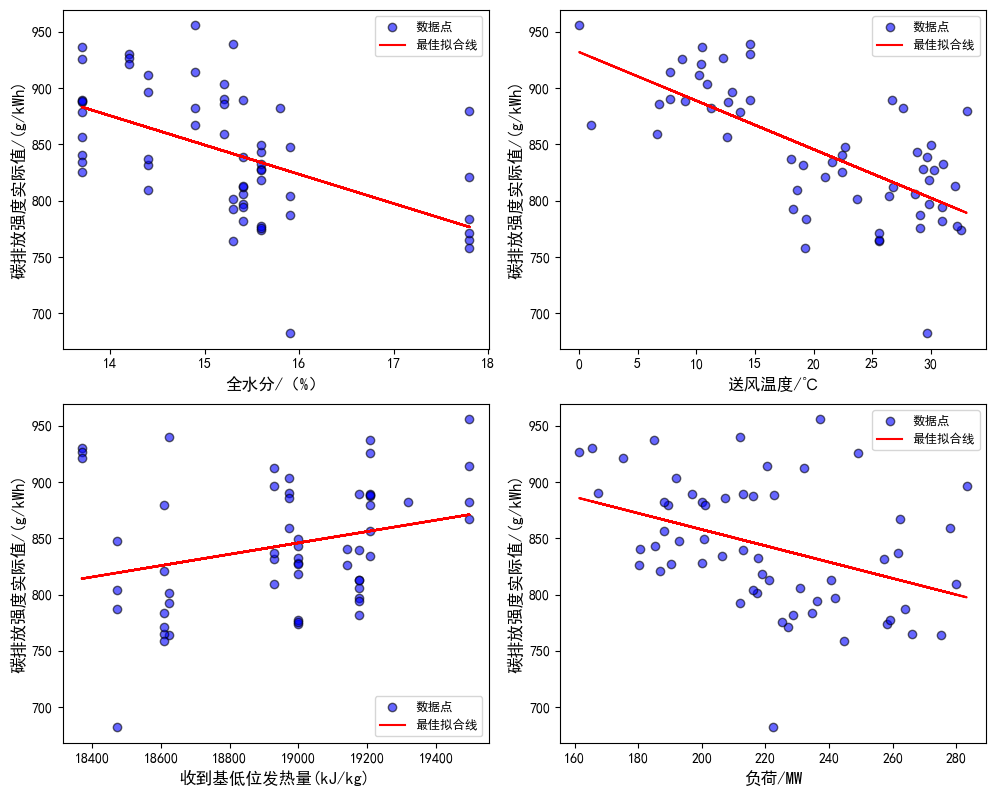

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: 全水分（%） vs 碳排放强度
axs[0, 0].scatter(X1_test['全水分（%）'], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test['全水分（%）'], y1_test)
axs[0, 0].plot(X1_test['全水分（%）'], slope * X1_test['全水分（%）'] + intercept, color='red', label='最佳拟合线')
axs[0, 0].set_xlabel('全水分/（%）', fontsize=12)
axs[0, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 0].legend(fontsize=9)
axs[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: 送风温度 vs 碳排放强度
axs[0, 1].scatter(X1_test["送风温度"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test["送风温度"], y1_test)
axs[0, 1].plot(X1_test["送风温度"], slope * X1_test["送风温度"] + intercept, color='red', label='最佳拟合线')
axs[0, 1].set_xlabel("送风温度/℃", fontsize=12)
axs[0, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 1].legend(fontsize=9)
axs[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot 3: 收到基低位发热量(kJ/kg) vs 碳排放强度
axs[1, 0].scatter(X1_test['收到基低位发热量(kJ/kg)'], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test['收到基低位发热量(kJ/kg)'], y1_test)
axs[1, 0].plot(X1_test['收到基低位发热量(kJ/kg)'], slope * X1_test['收到基低位发热量(kJ/kg)'] + intercept, color='red', label='最佳拟合线')
axs[1, 0].set_xlabel('收到基低位发热量(kJ/kg)', fontsize=12)
axs[1, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 0].legend(fontsize=9)
axs[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 4: 负荷 vs 碳排放强度
axs[1, 1].scatter(X1_test["负荷"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test["负荷"], y1_test)
axs[1, 1].plot(X1_test["负荷"], slope * X1_test["负荷"] + intercept, color='red', label='最佳拟合线')
axs[1, 1].set_xlabel("负荷/MW", fontsize=12)
axs[1, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 1].legend(fontsize=9)
axs[1, 1].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the combined plot
plt.show()


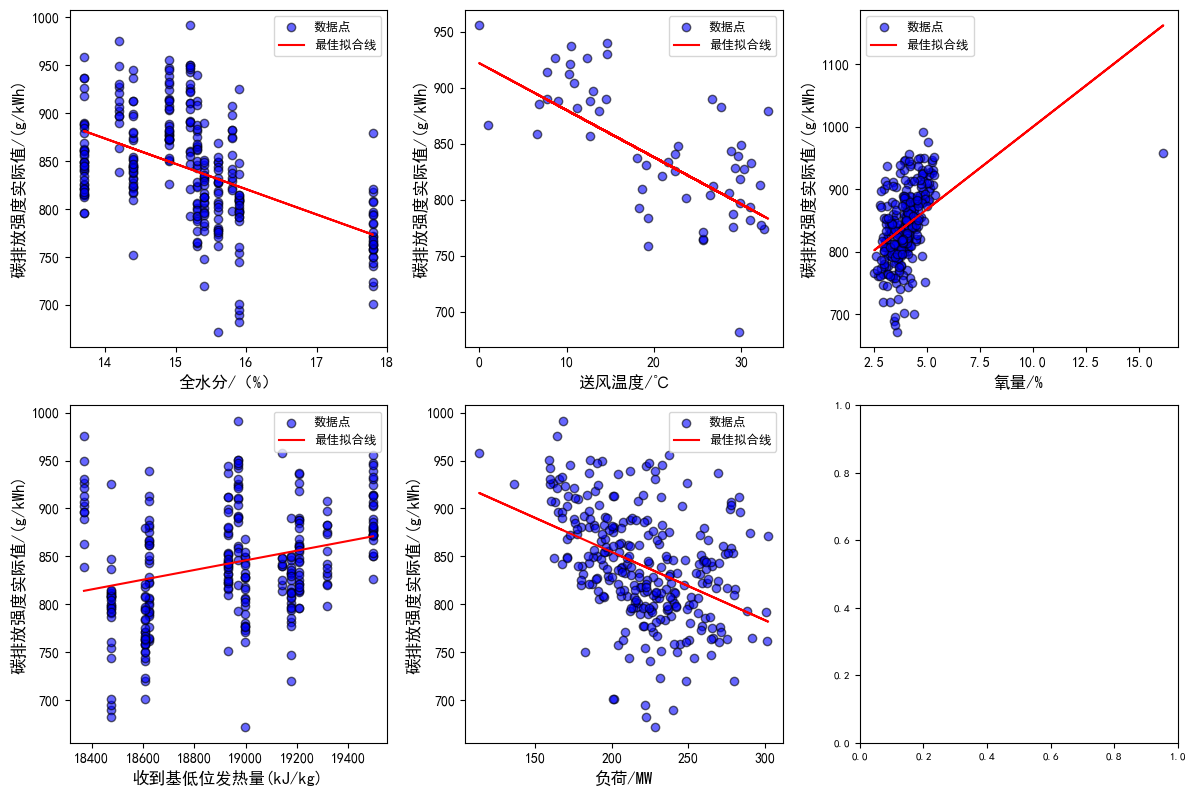

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create a 2x3 grid of subplots (增加一个新的图)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot 1: 全水分（%） vs 碳排放强度
axs[0, 0].scatter(X1['全水分（%）'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1['全水分（%）'], y1)
axs[0, 0].plot(X1['全水分（%）'], slope * X1['全水分（%）'] + intercept, color='red', label='最佳拟合线')
axs[0, 0].set_xlabel('全水分/（%）', fontsize=12)
axs[0, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 0].legend(fontsize=9)
axs[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: 送风温度 vs 碳排放强度
axs[0, 1].scatter(X1_test["送风温度"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1["送风温度"], y1)
axs[0, 1].plot(X1_test["送风温度"], slope * X1_test["送风温度"] + intercept, color='red', label='最佳拟合线')
axs[0, 1].set_xlabel("送风温度/℃", fontsize=12)
axs[0, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 1].legend(fontsize=9)
axs[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot 3: 收到基低位发热量(kJ/kg) vs 碳排放强度
axs[1, 0].scatter(X1['收到基低位发热量(kJ/kg)'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test['收到基低位发热量(kJ/kg)'], y1_test)
axs[1, 0].plot(X1['收到基低位发热量(kJ/kg)'], slope * X1['收到基低位发热量(kJ/kg)'] + intercept, color='red', label='最佳拟合线')
axs[1, 0].set_xlabel('收到基低位发热量(kJ/kg)', fontsize=12)
axs[1, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 0].legend(fontsize=9)
axs[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 4: 负荷 vs 碳排放强度
axs[1, 1].scatter(X1['负荷'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1['负荷'], y1)
axs[1, 1].plot(X1['负荷'], slope * X1['负荷'] + intercept, color='red', label='最佳拟合线')
axs[1, 1].set_xlabel("负荷/MW", fontsize=12)
axs[1, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 1].legend(fontsize=9)
axs[1, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot 5: 氧量 vs 碳排放强度 (新添加的图)
axs[0, 2].scatter(X1['氧量'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1['氧量'], y1)
axs[0, 2].plot(X1['氧量'], slope * X1['氧量'] + intercept, color='red', label='最佳拟合线')
axs[0, 2].set_xlabel("氧量/%", fontsize=12)
axs[0, 2].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 2].legend(fontsize=9)
axs[0, 2].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Save the plot to an image file
plt.savefig('a1因素.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


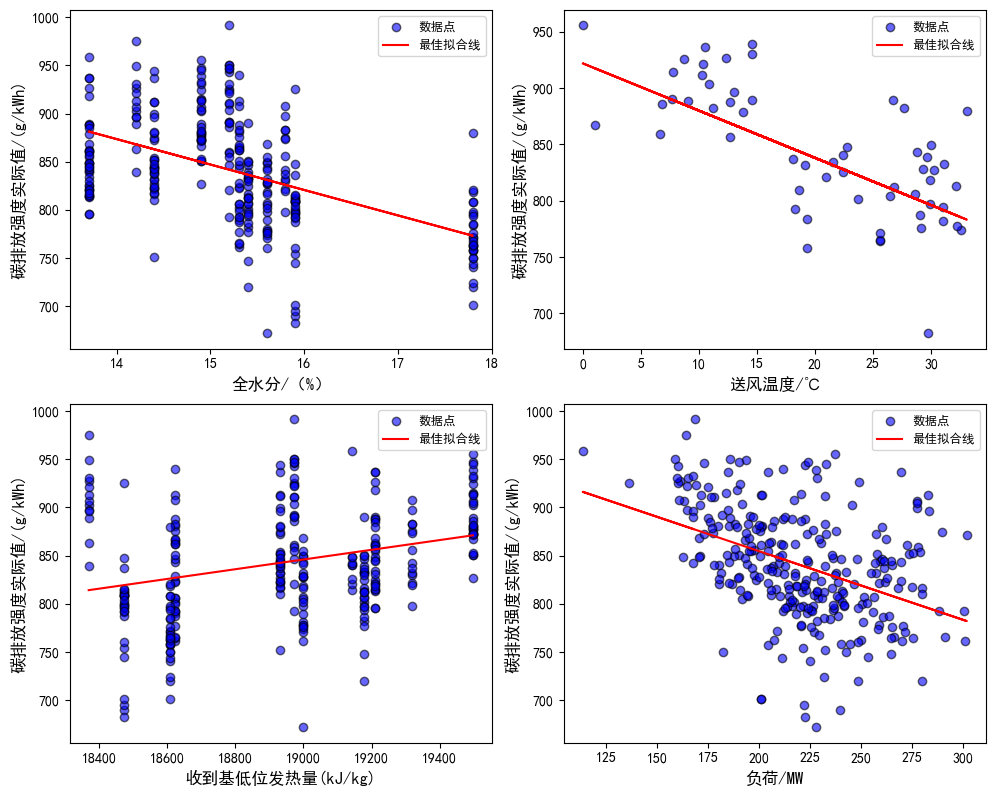

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: 全水分（%） vs 碳排放强度
axs[0, 0].scatter(X1['全水分（%）'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1['全水分（%）'], y1)
axs[0, 0].plot(X1['全水分（%）'], slope * X1['全水分（%）'] + intercept, color='red', label='最佳拟合线')
axs[0, 0].set_xlabel('全水分/（%）', fontsize=12)
axs[0, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 0].legend(fontsize=9)
axs[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 2: 送风温度 vs 碳排放强度
axs[0, 1].scatter(X1_test["送风温度"], y1_test, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1["送风温度"], y1)
axs[0, 1].plot(X1_test["送风温度"], slope * X1_test["送风温度"] + intercept, color='red', label='最佳拟合线')
axs[0, 1].set_xlabel("送风温度/℃", fontsize=12)
axs[0, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[0, 1].legend(fontsize=9)
axs[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot 3: 收到基低位发热量(kJ/kg) vs 碳排放强度
axs[1, 0].scatter(X1['收到基低位发热量(kJ/kg)'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1_test['收到基低位发热量(kJ/kg)'], y1_test)
axs[1, 0].plot(X1['收到基低位发热量(kJ/kg)'], slope * X1['收到基低位发热量(kJ/kg)'] + intercept, color='red', label='最佳拟合线')
axs[1, 0].set_xlabel('收到基低位发热量(kJ/kg)', fontsize=12)
axs[1, 0].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 0].legend(fontsize=9)
axs[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot 4: 负荷 vs 碳排放强度
axs[1, 1].scatter(X1['负荷'], y1, color='blue', alpha=0.6, edgecolor='k', label='数据点')
# Calculate best fit line
slope, intercept, _, _, _ = linregress(X1['负荷'], y1)
axs[1, 1].plot(X1['负荷'], slope * X1['负荷'] + intercept, color='red', label='最佳拟合线')
axs[1, 1].set_xlabel("负荷/MW", fontsize=12)
axs[1, 1].set_ylabel("碳排放强度实际值/(g/kWh)", fontsize=12)
axs[1, 1].legend(fontsize=9)
axs[1, 1].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout to make sure subplots fit well
plt.tight_layout()

# Show the combined plot
plt.savefig('a因素.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


## #1#2机组各自拟合模型预测结果

In [153]:
np.concatenate((xgb_y1_pred, xgb_y2_pred,xgb_y3_pred))

array([831.9029 , 777.2492 , 884.1065 , 821.99554, 829.7075 , 905.62244,
       827.41815, 809.6379 , 827.2545 , 793.18713, 836.9672 , 945.80664,
       835.3012 , 868.1526 , 872.41907, 787.37604, 899.06805, 826.8513 ,
       881.0853 , 831.99384, 896.0918 , 785.0189 , 768.10614, 887.9211 ,
       887.53705, 927.6879 , 792.46027, 861.9988 , 759.3961 , 882.7585 ,
       763.0886 , 834.11383, 765.5904 , 870.79913, 821.4788 , 788.29333,
       813.63776, 826.15326, 813.2821 , 788.5789 , 838.13104, 863.1287 ,
       790.021  , 890.2999 , 828.8612 , 910.89026, 909.27484, 803.55756,
       817.725  , 782.5636 , 892.14075, 874.986  , 901.82935, 697.0905 ,
       832.3725 , 760.30554, 926.79553, 920.7812 , 763.41943, 802.7855 ,
       781.7778 , 796.22314, 732.6464 , 793.2108 , 756.106  , 787.25507,
       808.90875, 732.2    , 760.1895 , 835.40985, 746.24927, 785.30786,
       759.35516, 752.36334, 749.9236 , 760.06384, 811.9337 , 770.787  ,
       768.3246 , 768.1739 , 770.78094, 779.14   , 

In [170]:
y_test = pd.concat([y1_test,y2_test,y4_test])
xgb_y_pred = np.concatenate((xgb_y1_pred,xgb_y2_pred,xgb_y4_pred))

In [172]:
len(y_test)

149

In [175]:
cleaned_df3.describe()

,日期,炉给水温度,送风温度,氧量,空预器漏风率,热力计算排烟温度,氧含量(%),烟气流量,主汽温度,机主汽压力,...,发电厂用电率,运行小时,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,二氧化碳,碳排放量,碳排放强度
count,234,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,2023-08-30 07:53:50.769230848,293.140812,22.292179,4.026709,4.077393,121.115684,3.547390,1.539444e+06,598.206880,24.154615,...,3.706923,23.978846,57.489145,24.347137,17.611026,19386.431667,16.709402,2809.169444,7213.411795,372.754041
min,2023-04-21 00:00:00,275.500000,0.000000,2.770000,0.000000,107.100000,0.000000,8.236340e+05,588.230000,15.900000,...,2.990000,19.050000,53.280000,23.690000,14.960000,18890.000000,14.300000,1253.880000,2933.340000,282.749574
25%,2023-06-26 06:00:00,290.212500,17.597500,3.450000,3.310000,117.987500,3.137726,1.409815e+06,597.720000,22.050000,...,3.425000,24.000000,55.320000,24.150000,16.140000,18904.300000,14.600000,2821.925000,6429.410000,355.589779
50%,2023-09-05 12:00:00,293.840000,23.755000,3.945000,3.985000,122.130000,4.080677,1.565538e+06,598.270000,24.615000,...,3.710000,24.000000,57.780000,24.330000,17.840000,19282.760000,17.100000,2874.710000,7414.495000,376.854563
75%,2023-11-02 18:00:00,297.070000,28.340000,4.510000,4.970000,124.725000,4.661672,1.706780e+06,598.895000,26.470000,...,3.947500,24.000000,59.420000,24.760000,18.640000,19916.360000,18.000000,2897.752500,8110.427500,393.171774
max,2023-12-31 00:00:00,302.310000,34.260000,6.670000,9.670000,139.900000,6.745000,2.030137e+06,601.290000,28.590000,...,4.800000,24.000000,60.140000,24.980000,20.840000,20186.400000,18.600000,2902.060000,9800.210000,420.368294
std,NaN,5.327772,7.881636,0.721684,1.867608,5.334976,1.738973,2.337278e+05,1.241383,2.933524,...,0.352047,0.323592,2.033996,0.384506,1.757772,458.432434,1.550079,218.215611,1261.443875,23.475781


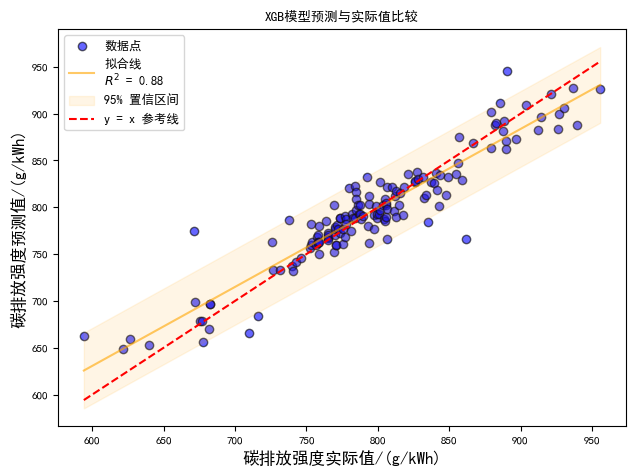

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，xgb_y1_pred 是 XGB 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y_test, xgb_y_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y_test)

# 计算残差
residuals = xgb_y_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y_test, 'y_pred': xgb_y_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {r2_score(y_test, xgb_y_pred):.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.1, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_XGB.png', dpi=2000, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [176]:
y_test2 = pd.concat([y1_test,y2_test,y3_test,y4_test])
xgb_y_pred2 = np.concatenate((xgb_y1_pred,xgb_y2_pred,xgb_y3_pred,xgb_y4_pred))


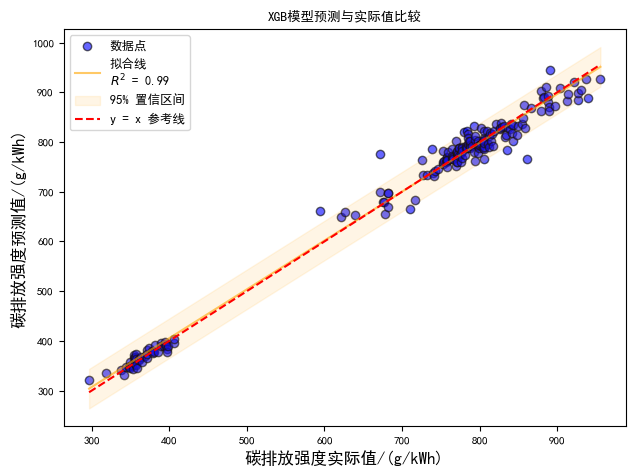

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，xgb_y1_pred 是 XGB 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y_test2 , xgb_y_pred2, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y_test2 )

# 计算残差
residuals = xgb_y_pred2 - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y_test2 , 'y_pred': xgb_y_pred2, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {r2_score(y_test2 , xgb_y_pred2):.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.1, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_XGB_with_fit_line_and_ci_sorted.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，rf_y1_pred 是 RF 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y1_test, rf_y1_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y1_test)

# 计算残差
residuals = rf_y1_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'y_pred': rf_y1_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {np.corrcoef(sorted_y_test, sorted_y_pred)[0,1]**2:.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.2, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("RF模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_RF_with_fit_line_and_ci_sorted.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，svm_y_pred 是 SVM 模型的预测值

# 计算线性回归拟合系数
z = np.polyfit(y1_test, svm_y_pred, 1)  # 线性拟合
p = np.poly1d(z)  # 得到拟合的多项式函数

# 计算拟合值
y_fit = p(y1_test)

# 计算残差
residuals = svm_y_pred - y_fit

# 计算标准误差
std_err = np.std(residuals)

# 计算95%置信区间
confidence_interval = 1.96 * std_err  # 95%置信区间对应的倍数是1.96

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'y_pred': svm_y_pred, 'y_fit': y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_y_pred = data_sorted['y_pred'].values
sorted_y_fit = data_sorted['y_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 绘制拟合线
plt.plot(sorted_y_test, sorted_y_fit, color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {np.corrcoef(sorted_y_test, sorted_y_pred)[0,1]**2:.2f}")

# 绘制95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_y_fit - confidence_interval, sorted_y_fit + confidence_interval, color='orange', alpha=0.2, label='95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), sorted_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), sorted_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("SVM模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_SVM_with_fit_line_and_ci_sorted.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设 y1_test 是实际值，rf_y1_pred, xgb_y1_pred, svm_y_pred 分别是三个模型的预测值

# 计算每个模型的拟合曲线及其标准误差

# 计算线性回归拟合系数并得到拟合函数
def get_fit_and_ci(y_test, y_pred):
    z = np.polyfit(y_test, y_pred, 1)  # 线性拟合
    p = np.poly1d(z)  # 得到拟合的多项式函数
    y_fit = p(y_test)  # 计算拟合值
    residuals = y_pred - y_fit  # 计算残差
    std_err = np.std(residuals)  # 计算标准误差
    confidence_interval = 1.96 * std_err  # 计算95%置信区间
    return y_fit, confidence_interval

# 获取每个模型的拟合线和置信区间
rf_y_fit, rf_confidence_interval = get_fit_and_ci(y1_test, rf_y1_pred)
xgb_y_fit, xgb_confidence_interval = get_fit_and_ci(y1_test, xgb_y1_pred)
svm_y_fit, svm_confidence_interval = get_fit_and_ci(y1_test, svm_y_pred)

# 使用 pandas DataFrame 排序
data = pd.DataFrame({'y_test': y1_test, 'rf_pred': rf_y1_pred, 'xgb_pred': xgb_y1_pred, 'svm_pred': svm_y_pred,
                     'rf_fit': rf_y_fit, 'xgb_fit': xgb_y_fit, 'svm_fit': svm_y_fit})

# 按 'y_test' 升序排序
data_sorted = data.sort_values(by='y_test')

# 提取排序后的值
sorted_y_test = data_sorted['y_test'].values
sorted_rf_pred = data_sorted['rf_pred'].values
sorted_xgb_pred = data_sorted['xgb_pred'].values
sorted_svm_pred = data_sorted['svm_pred'].values
sorted_rf_fit = data_sorted['rf_fit'].values
sorted_xgb_fit = data_sorted['xgb_fit'].values
sorted_svm_fit = data_sorted['svm_fit'].values

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(sorted_y_test, sorted_rf_pred, color='blue', alpha=0.6, edgecolor='k', label='RF 数据点')
plt.scatter(sorted_y_test, sorted_xgb_pred, color='red', alpha=0.6, edgecolor='k', label='XGB 数据点')
plt.scatter(sorted_y_test, sorted_svm_pred, color='green', alpha=0.6, edgecolor='k', label='SVM 数据点')

# 绘制每个模型的拟合线
plt.plot(sorted_y_test, sorted_rf_fit, color='blue', alpha=0.6, label="RF 拟合线")
plt.plot(sorted_y_test, sorted_xgb_fit, color='red', alpha=0.6, label="XGBoost 拟合线")
plt.plot(sorted_y_test, sorted_svm_fit, color='green', alpha=0.6, label="SVM 拟合线")

# 绘制每个模型的95%置信区间阴影区域
plt.fill_between(sorted_y_test, sorted_rf_fit - rf_confidence_interval, sorted_rf_fit + rf_confidence_interval, color='blue', alpha=0.1, label='RF 95% 置信区间')
plt.fill_between(sorted_y_test, sorted_xgb_fit - xgb_confidence_interval, sorted_xgb_fit + xgb_confidence_interval, color='red', alpha=0.1, label='XGB 95% 置信区间')
plt.fill_between(sorted_y_test, sorted_svm_fit - svm_confidence_interval, sorted_svm_fit + svm_confidence_interval, color='green', alpha=0.1, label='SVM 95% 置信区间')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(sorted_y_test.max(), max(sorted_rf_pred.max(), sorted_xgb_pred.max(), sorted_svm_pred.max()))  # 找到最大值，确保参考线绘制完整
min_val = min(sorted_y_test.min(), min(sorted_rf_pred.min(), sorted_xgb_pred.min(), sorted_svm_pred.min()))  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'y--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('三个模型预测值与实际值的吻合度_with_fit_line_and_ci.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 y1_test 是实际值，xgb_y1_pred 是XGB模型的预测值

# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, xgb_y1_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')

# 使用numpy.polyfit拟合线，1表示线性拟合（一次多项式）
z = np.polyfit(y1_test, xgb_y1_pred, 1)
p = np.poly1d(z)

# 绘制拟合线
plt.plot(y1_test, p(y1_test), color='orange', alpha=0.6, label=f"拟合线\n$R^2$ = {np.corrcoef(y1_test, xgb_y1_pred)[0,1]**2:.2f}")

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.title("XGB模型预测与实际值比较")
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_with_fit_line.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, rf_y1_pred, color='#4874CB', alpha=0.6, edgecolor='k', label='rf',marker = "^")
plt.scatter(y1_test, xgb_y1_pred, color='#8DC5CC', alpha=0.6, edgecolor='k', label='xgb')
plt.scatter(y1_test, svm_y_pred, color='#F4EADB', alpha=0.6, edgecolor='k', label='svm',marker = "s")
#plt.scatter(y_test_rescaled, lstm_y_pred_rescaled, color='yellow', alpha=0.6, edgecolor='k', label='lstm')


# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# 假设：y1_test是实际值，rf_y1_pred是RF模型的预测值，xgb_y1_pred是XGB模型的预测值等

# 计算误差
rf_errors = np.abs(y1_test - rf_y1_pred)  # RF模型的误差
xgb_errors = np.abs(y1_test - xgb_y1_pred)  # XGB模型的误差
svm_errors = np.abs(y1_test - svm_y_pred)  # SVM模型的误差
lstm_errors = np.abs(y_test_rescaled - lstm_y_pred_rescaled)  # lstm模型的误差

# 将误差大小调整为适当的散点大小范围（比如误差 * 10）
rf_sizes = rf_errors * 10  # 控制散点大小
xgb_sizes = xgb_errors * 10
svm_sizes = svm_errors * 10
lstm_sizes = lstm_errors * 10

# 绘制散点图
plt.figure(figsize=(10, 6))

# 使用误差作为散点的大小
scatter_rf = plt.scatter(y1_test, rf_y1_pred, s=rf_sizes, alpha=0.6, edgecolor='k', label='RF')
scatter_xgb = plt.scatter(y1_test, xgb_y1_pred, s=xgb_sizes, alpha=0.6, edgecolor='k', label='XGB')
scatter_svm = plt.scatter(y1_test, svm_y_pred, s=svm_sizes, alpha=0.6, edgecolor='k', label='SVM')
scatter_lstm = plt.scatter(y_test_rescaled, lstm_y_pred_rescaled, s=lstm_sizes, alpha=0.6, edgecolor='k', label='LSTM')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_with_error_size.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# 假设：y1_test是实际值，rf_y1_pred是RF模型的预测值，xgb_y1_pred是XGB模型的预测值等

# 计算误差
rf_errors = np.abs(y1_test - rf_y1_pred)  # RF模型的误差
xgb_errors = np.abs(y1_test - xgb_y1_pred)  # XGB模型的误差
svm_errors = np.abs(y1_test - svm_y_pred)  # SVM模型的误差

# 绘制散点图
plt.figure(figsize=(10, 6))

# 使用误差作为颜色和大小的依据
scatter_rf = plt.scatter(y1_test, rf_y1_pred, c=rf_errors, s=rf_errors*10, alpha=0.6, cmap='Blues', edgecolor='k', label='RF')
scatter_xgb = plt.scatter(y1_test, xgb_y1_pred, c=xgb_errors, s=xgb_errors*10, alpha=0.6, cmap='Reds', edgecolor='k', label='XGB')
scatter_svm = plt.scatter(y1_test, svm_y_pred, c=svm_errors, s=svm_errors*10, alpha=0.6, cmap='Greens', edgecolor='k', label='SVM')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 添加颜色条（误差值的颜色映射）
plt.colorbar(scatter_rf, label='误差（RF）', orientation='vertical')
plt.colorbar(scatter_xgb, label='误差（XGB）', orientation='vertical')
plt.colorbar(scatter_svm, label='误差（SVM）', orientation='vertical')

# 图表标题和标签
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9,markerscale=0.8, labelspacing=1)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_with_error_size_color.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# 假设：y1_test是实际值，rf_y1_pred是RF模型的预测值，xgb_y1_pred是XGB模型的预测值等

# 计算误差
rf_errors = np.abs(y1_test - rf_y1_pred)  # RF模型的误差
xgb_errors = np.abs(y1_test - xgb_y1_pred)  # XGB模型的误差
svm_errors = np.abs(y1_test - svm_y_pred)  # SVM模型的误差

# 绘制散点图
plt.figure(figsize=(10, 6))

# 使用误差作为颜色和大小的依据
scatter_rf = plt.scatter(y1_test, rf_y1_pred, c=rf_errors, s=rf_errors*10, alpha=0.6, cmap='Blues', edgecolor='k', label='RF')
scatter_xgb = plt.scatter(y1_test, xgb_y1_pred, c=xgb_errors, s=xgb_errors*10, alpha=0.6, cmap='Reds', edgecolor='k', label='XGB')
scatter_svm = plt.scatter(y1_test, svm_y_pred, c=svm_errors, s=svm_errors*10, alpha=0.6, cmap='Greens', edgecolor='k', label='SVM')

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 添加颜色条（误差值的颜色映射）
cbar_rf = plt.colorbar(scatter_rf, label='误差（RF）', orientation='vertical')
cbar_xgb = plt.colorbar(scatter_xgb, label='误差（XGB）', orientation='vertical')
cbar_svm = plt.colorbar(scatter_svm, label='误差（SVM）', orientation='vertical')

# 调整颜色条的位置（通过设置 cbar的位置）
cbar_rf.ax.tick_params(labelsize=10)
cbar_xgb.ax.tick_params(labelsize=10)
cbar_svm.ax.tick_params(labelsize=10)

# 调整布局，增加颜色条之间的距离
plt.subplots_adjust(right=0.8)  # 调整图形右边的空白区域

# 设置颜色条之间的间距
cbar_rf.ax.set_position([0.85, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
cbar_xgb.ax.set_position([0.88, 0.1, 0.03, 0.8]) 
cbar_svm.ax.set_position([0.91, 0.1, 0.03, 0.8])

# 图表标题和标签
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9, markerscale=0.8, labelspacing=1)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_with_error_size_color.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# 假设：y1_test是实际值，rf_y1_pred是RF模型的预测值，xgb_y1_pred是XGB模型的预测值等

# 计算误差
rf_errors = np.abs(y1_test - rf_y1_pred)  # RF模型的误差
xgb_errors = np.abs(y1_test - xgb_y1_pred)  # XGB模型的误差
svm_errors = np.abs(y1_test - svm_y_pred)  # SVM模型的误差

# 绘制散点图
plt.figure(figsize=(10, 6))

# 使用误差作为颜色的依据
scatter_rf = plt.scatter(y1_test, rf_y1_pred, c=rf_errors, cmap='Blues', alpha=0.6, edgecolor='k', label='RF', marker="^")
scatter_xgb = plt.scatter(y1_test, xgb_y1_pred, c=xgb_errors, cmap='Reds', alpha=0.6, edgecolor='k', label='XGB')
scatter_svm = plt.scatter(y1_test, svm_y_pred, c=svm_errors, cmap='Greens', alpha=0.6, edgecolor='k', label='SVM', marker="s")

# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), xgb_y1_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), xgb_y1_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 添加颜色条（误差值的颜色映射）
plt.colorbar(scatter_rf, label='误差（RF）', orientation='vertical')
plt.colorbar(scatter_xgb, label='误差（XGB）', orientation='vertical')
plt.colorbar(scatter_svm, label='误差（SVM）', orientation='vertical')

# 图表标题和标签
plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度_with_error_color.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
training_df1.columns

In [ ]:
training_df1.rename(columns={
    '负荷/MW': '负荷',
    '送风温度/℃': '送风温度',
}, inplace=True)

In [ ]:
training_df1[training_df1["碳排放强度"] > 900]

In [ ]:
import numpy as np

# 假设 training_df1 是训练数据集，xgb_model 是已经训练好的XGBoost模型

# 计算负荷为220MW时的碳排放强度
data_220MW = training_df1.copy()
data_220MW['负荷'] = 210 # 设置负荷为220MW
pred_220MW = xgb_model.predict(data_220MW.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

# 计算负荷为221MW时的碳排放强度
data_221MW = training_df1.copy()
data_221MW['负荷'] = 211  # 设置负荷为221MW
pred_221MW = xgb_model.predict(data_221MW.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

# 计算碳排放强度减少的百分比
decrease_percentage = ((np.mean(pred_220MW) - np.mean(pred_221MW)) / np.mean(pred_220MW)) * 100

# 打印结果
print(f"负荷从220MW增加到221MW时，碳排放强度减少的百分比为：{decrease_percentage:.2f}%")


In [ ]:
import numpy as np

# 假设 training_df1 是训练数据集，xgb_model 是已经训练好的XGBoost模型

# 1. 计算负荷从220MW提升到221MW时的碳排放强度变化
data_220MW = training_df1.copy()
data_220MW['负荷'] = 220  # 设置负荷为220MW
pred_220MW = xgb_model.predict(data_220MW.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

data_221MW = training_df1.copy()
data_221MW['负荷'] = 221  # 设置负荷为221MW
pred_221MW = xgb_model.predict(data_221MW.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

decrease_percentage_load = ((np.mean(pred_220MW) - np.mean(pred_221MW)) / np.mean(pred_220MW)) * 100
print(f"负荷从220MW增加到221MW时，碳排放强度变化的百分比为：{decrease_percentage_load:.2f}%")


# 2. 计算全水分从15%提升到16%时的碳排放强度变化
data_15moisture = training_df1.copy()
data_15moisture['全水分（%）'] = 17  # 设置全水分为15%
pred_15moisture = xgb_model.predict(data_15moisture.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

data_16moisture = training_df1.copy()
data_16moisture['全水分（%）'] = 18 # 设置全水分为16%
pred_16moisture = xgb_model.predict(data_16moisture.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

decrease_percentage_moisture = ((np.mean(pred_15moisture) - np.mean(pred_16moisture)) / np.mean(pred_15moisture)) * 100
print(f"全水分从15%增加到16%时，碳排放强度变化的百分比为：{decrease_percentage_moisture:.2f}%")


# 3. 计算送风温度从15℃增加到16℃时的碳排放强度变化
data_15temp = training_df1.copy()
data_15temp['送风温度'] = 15  # 设置送风温度为15℃
pred_15temp = xgb_model.predict(data_15temp.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

data_16temp = training_df1.copy()
data_16temp['送风温度'] = 16  # 设置送风温度为16℃
pred_16temp = xgb_model.predict(data_16temp.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

decrease_percentage_temp = ((np.mean(pred_15temp) - np.mean(pred_16temp)) / np.mean(pred_15temp)) * 100
print(f"送风温度从15℃增加到16℃时，碳排放强度变化的百分比为：{decrease_percentage_temp:.2f}%")


# 4. 计算氧量从4%降低到3%时的碳排放强度变化
data_4oxygen = training_df1.copy()
data_4oxygen['氧量'] = 4  # 设置氧量为4%
pred_4oxygen = xgb_model.predict(data_4oxygen.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

data_3oxygen = training_df1.copy()
data_3oxygen['氧量'] = 3  # 设置氧量为3%
pred_3oxygen = xgb_model.predict(data_3oxygen.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

decrease_percentage_oxygen = ((np.mean(pred_4oxygen) - np.mean(pred_3oxygen)) / np.mean(pred_4oxygen)) * 100
print(f"氧量从4%降低到3%时，碳排放强度变化的百分比为：{decrease_percentage_oxygen:.2f}%")


# 5. 计算收到基低位发热量从18600 kJ/kg降低到18599 kJ/kg时的碳排放强度变化
data_18600HV = training_df1.copy()
data_18600HV['收到基低位发热量(kJ/kg)'] = 18600  # 设置收到基低位发热量为18600 kJ/kg
pred_18600HV = xgb_model.predict(data_18600HV.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

data_18599HV = training_df1.copy()
data_18599HV['收到基低位发热量(kJ/kg)'] = 10000  # 设置收到基低位发热量为18599 kJ/kg
pred_18599HV = xgb_model.predict(data_18599HV.drop(columns=['日期', '碳排放强度']))  # 预测碳排放强度

decrease_percentage_HV = ((np.mean(pred_18600HV) - np.mean(pred_18599HV)) / np.mean(pred_18600HV)) * 100
print(f"收到基低位发热量从18600 kJ/kg降低到17600 kJ/kg时，碳排放强度变化的百分比为：{decrease_percentage_HV:.5f}%")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# 假设 t2_features1 是我们要分析的特征
t2_features1 = ['负荷', '送风温度', ('负荷', '送风温度')]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(
    xgb_model, 
    training_df1.drop(columns=['日期', '碳排放强度']), 
    features=t2_features1
)

# 提取偏依赖量的变化范围
for feature in t2_features1:
    ice_values = disp.ice_values[feature]  # 获取每个特征的PDP值
    min_value = np.min(ice_values[0])  # 最小偏依赖量
    max_value = np.max(ice_values[0])  # 最大偏依赖量
    
    print(f"特征 {feature} 的偏依赖量变化范围：")
    print(f"  最小值：{min_value:.2f}")
    print(f"  最大值：{max_value:.2f}")
    print(f"  偏依赖量变化区间：({min_value:.2f}, {max_value:.2f})\n")

# 设置偏依赖图的标签和样式
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # 设置y轴标签
disp.axes_.ravel()[2].set_ylabel('送风温度/℃', fontsize=13, fontweight='bold')  # 设置y轴标签
disp.axes_.ravel()[0].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # 设置x轴标签
disp.axes_.ravel()[1].set_xlabel('送风温度/℃', fontsize=13, fontweight='bold')  # 设置x轴标签
disp.axes_.ravel()[2].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # 设置x轴标签

# 调整图形布局
plt.subplots_adjust(wspace=0.7)
plt.show()


In [ ]:
t2_features1 = ['负荷', '送风温度',('负荷','送风温度' )]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), t2_features1)

# Modify the y-axis label from "PartialDependence" to "偏依赖量"
# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_ylabel('送风温度/℃', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[1].set_xlabel('送风温度/℃', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 

# Save the plot to an image file
plt.savefig('partial_dependence_plot1.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
80/880 * 100

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.inspection import partial_dependence

# 定义要分析的特征
features = ['负荷', '送风温度']
# 使用模型和数据获取部分依赖数据
pd_results = partial_dependence(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), features)

# 获取网格数据，用于绘制3D图
X_axis, Y_axis = np.meshgrid(pd_results["values"][0], pd_results["values"][1])
Z = pd_results["average"].reshape(X_axis.shape)

# 绘制3D图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用曲面图来展示部分依赖
ax.plot_surface(X_axis, Y_axis, Z, cmap="viridis")

# 设置坐标轴标签
ax.set_xlabel('负荷')
ax.set_ylabel('送风温度')
ax.set_zlabel('碳排放强度偏依赖')

# 设置标题
plt.suptitle('三维偏依赖图示：负荷和送风温度')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 假设数据在一个DataFrame df 中
df = training_df1[['负荷', '全水分（%）','碳排放强度']]

# 1. 根据负荷分割数据
负荷_中位数 = df['负荷'].median()
高负荷_df = df[df['负荷'] >= 负荷_中位数]
低负荷_df = df[df['负荷'] < 负荷_中位数]

# 2. 在每个子集上构建回归模型
def analyze_temperature_influence(data, subset_name):
    X = data[['全水分（%）']]
    y = data['碳排放强度']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # 打印回归系数和R²分数
    coef = model.coef_[0]
    r2 = r2_score(y, y_pred)
    print(f"{subset_name} - 全水分对碳排放强度的回归系数: {coef:.4f}, R²分数: {r2:.4f}")

# 3. 分析高负荷和低负荷下送风温度的影响
analyze_temperature_influence(高负荷_df, "高负荷")
analyze_temperature_influence(低负荷_df, "低负荷")


In [ ]:
training_df1.columns

In [ ]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [ ]:
t2_features2 = ['负荷', '全水分（%）',('负荷', '全水分（%）')]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(
    xgb_model, 
    training_df1.drop(columns=['日期', '碳排放强度']), 
    t2_features2
)
# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 
# Save the plot to an image file
plt.savefig('partial_dependence_plot2.png', dpi=500, bbox_inches='tight')  # Save as PNG with 300 dpi
plt.show()

In [ ]:

# 定义要分析的特征
features = ['负荷', '全水分（%）']
# 使用模型和数据获取部分依赖数据
pd_results = partial_dependence(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), features)

# 获取网格数据，用于绘制3D图
X_axis, Y_axis = np.meshgrid(pd_results["values"][0], pd_results["values"][1])
Z = pd_results["average"].reshape(X_axis.shape)

# 绘制3D图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用曲面图来展示部分依赖
ax.plot_surface(X_axis, Y_axis, Z, cmap="viridis")

# 设置坐标轴标签
ax.set_xlabel('负荷')
ax.set_ylabel('全水分（%）')
ax.set_zlabel('碳排放强度偏依赖')

# 设置标题
plt.suptitle('三维偏依赖图示：负荷和全水分（%）')
plt.show()


In [ ]:
t2_features3 = ['负荷', '氧量',('负荷', '氧量')]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), t2_features3)

# Modify the y-axis label from "PartialDependence" to "偏依赖量"
disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_ylabel('氧量%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[0].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[1].set_xlabel('氧量%', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
disp.axes_.ravel()[2].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold
plt.subplots_adjust(wspace=0.7) 

# Save the plot to an image file
plt.savefig('partial_dependence_plot3.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

In [ ]:
# 定义要分析的特征
features = ['负荷',  '氧量']
# 使用模型和数据获取部分依赖数据
pd_results = partial_dependence(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), features)

# 获取网格数据，用于绘制3D图
X_axis, Y_axis = np.meshgrid(pd_results["values"][0], pd_results["values"][1])
Z = pd_results["average"].reshape(X_axis.shape)

# 绘制3D图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用曲面图来展示部分依赖
ax.plot_surface(X_axis, Y_axis, Z, cmap="viridis")

# 设置坐标轴标签
ax.set_xlabel('负荷')
ax.set_ylabel('氧量)')
ax.set_zlabel('碳排放强度偏依赖')

# 设置标题
plt.suptitle('三维偏依赖图示：负荷和氧量')
plt.show()


In [ ]:
t2_features4 = ['负荷', '收到基低位发热量(kJ/kg)',('负荷', '收到基低位发热量(kJ/kg)')]

# 生成双向部分依赖图
disp = PartialDependenceDisplay.from_estimator(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), t2_features4)

disp.axes_.ravel()[0].set_ylabel('偏依赖量/(g/kWh)', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold

disp.axes_.ravel()[0].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold

disp.axes_.ravel()[2].set_xlabel('负荷/MW', fontsize=13, fontweight='bold')  # Set y-axis label and make it bold

plt.subplots_adjust(wspace=0.7) 
# Save the plot to an image file
plt.savefig('partial_dependence_plot4.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

In [ ]:
# 定义要分析的特征
features = ['负荷',  '收到基低位发热量(kJ/kg)']
# 使用模型和数据获取部分依赖数据
pd_results = partial_dependence(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), features)

# 获取网格数据，用于绘制3D图
X_axis, Y_axis = np.meshgrid(pd_results["values"][0], pd_results["values"][1])
Z = pd_results["average"].reshape(X_axis.shape)

# 绘制3D图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用曲面图来展示部分依赖
ax.plot_surface(X_axis, Y_axis, Z, cmap="viridis")

# 设置坐标轴标签
ax.set_xlabel('负荷')
ax.set_ylabel('收到基低位发热量(kJ/kg)')
ax.set_zlabel('碳排放强度偏依赖')

# 设置标题
plt.suptitle('三维偏依赖图示：负荷和收到基低位发热量(kJ/kg)')
plt.show()


In [ ]:
# t2_features = ['负荷', '收到基低位发热量(kJ/kg)']

# # 生成双向部分依赖图
# PartialDependenceDisplay.from_estimator(xgb_model, training_df1.drop(columns=['日期', '碳排放强度']), t2_features4)
 
# plt.suptitle('双因素偏依赖图示：负荷和收到基低位发热量(kJ/kg)')
# plt.subplots_adjust(wspace=0.4) 
# plt.show()

In [ ]:
import shap
# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X1_test, show=False)
plt.savefig('shap.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Visualize SHAP violin plot
shap.summary_plot(shap_values, X1_test, plot_type="violin", show=False)

# Save the plot as a PNG with high resolution
plt.savefig('shap_violin.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()
#'#CA7373', '#4874CB'

In [ ]:
X1_test

In [ ]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test, plot_type="layered_violin", show=False, cmap=ncmap, max_display=12,)


fig = plt.gcf()
ax = fig.axes[-1]
ax.set_ylabel('特征值')
# ax.yaxis.label
ax.set_yticklabels(['低', '高'])

# 获取当前的坐标轴对象
ax = plt.gca()  # 获取当前的坐标轴对象
# 设置 x 轴标签（SHAP值）
ax.set_xlabel('SHAP值')  # 修改 x 轴的标签


# Save the plot as a PNG with high resolution
plt.savefig('shap1_violin_custom_colors.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)
shap.summary_plot(shap_values, X1_test)

In [ ]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test, plot_type="layered_violin", show=False, cmap=ncmap, max_display=12)

# Save the plot as a PNG with high resolution
plt.savefig('shap1_violin_custom_colors_with_values.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

# 假设 xgb_model 和 X1_test 已经定义和训练好了

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb2_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
X1_test_modified = X1_test.drop(X1_test.columns[-1], axis=1)  # Drop the third feature (index 2)

shap_values = explainer.shap_values(X1_test_modified)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test_modified, plot_type="layered_violin", show=False, cmap=ncmap)

# Save the plot as a PNG with high resolution
plt.savefig('shap1_violin_custom_colors_without_third_feature.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


In [ ]:
# Set global font properties using rcParams
plt.rcParams.update({
    'axes.labelsize': 13,          # Axis label font size
    'xtick.labelsize': 13,         # x-tick label font size
    'ytick.labelsize': 13,         # y-tick label font size
    'axes.titleweight': 'bold',    # Title weight (make the title bold)
    'axes.labelweight': 'bold',    # Axis label weight (make labels bold)
    'font.weight': 'bold'          # Global font weight for all text
})

In [ ]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

# Initialize the SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for the test dataset (or any data you want to explain)
shap_values = explainer.shap_values(X1_test)

# Create a custom colormap with two colors
colors = ['#CA7373', '#4874CB']  # Low -> high color scale
ncmap = mpl.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Visualize SHAP violin plot with custom colormap
shap.summary_plot(shap_values, X1_test, plot_type="layered_violin", show=False, cmap=ncmap)


#todo
fig = plt.gcf()
ax = fig.axes[-1]
ax.set_ylabel('特征值')


# # Retrieve the current axes
# ax = plt.gca()
# ax = fig.axes[-1]


# # Save the plot as a PNG with high resolution
# plt.savefig('shap1_violin_custom_colors.png', dpi=1200, bbox_inches='tight')  # Save as PNG with 1200 dpi
plt.show()


In [ ]:
colorbar

## 3.3 支持向量机

In [ ]:
training_df1.columns

In [ ]:
len(training_df1.columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 读取数据
data = training_df1

# 预处理
data['日期'] = pd.to_datetime(data['日期'])

svm_X = data.drop(columns=['碳排放强度', '日期'])
svm_y = data['碳排放强度']

# 特征缩放
scaler = StandardScaler()
svm_X_scaled = scaler.fit_transform(svm_X)


# 划分训练集和测试集
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X_scaled, svm_y, test_size=0.2, random_state=42)

# 创建并训练SVR模型
svr_model = SVR(kernel='linear')
svr_model.fit(svm_X_train, svm_y_train)

# 进行预测
svm_y_pred = svr_model.predict(svm_X_test)

# 评估模型
svm_mse = mean_squared_error(svm_y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(svm_y_test, svm_y_pred)
svm_mape = mean_absolute_percentage_error(svm_y_test, svm_y_pred) 
svm_r2 = r2_score(svm_y_test, svm_y_pred)


In [ ]:

print(f"svm_MSE: {svm_mse:.6f}")
print(f"svm_RMSE: {svm_rmse:.6f}")
print(f"svm_MAE: {svm_mae:.6f}")
print(f"svm_MAPE: {svm_mape*100:.6f}")
print(f"svm_R Square: {svm_r2:.6f}")


In [ ]:
# 绘制test data预测值和真实值
plt.plot(svm_y_pred, label='预测值')       # 添加预测值的标签
plt.plot(svm_y_test.values, label='实际值')  # 添加真实值的标签

# 显示图例
plt.legend(fontsize=15)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("svm.png",dpi=500,bbox_inches='tight')
plt.show()


In [ ]:
svm_y2_pred = svr_model.predict(X2)
# svm_y2_pred 

In [ ]:
# 绘制散点图，x轴为实际值，y轴为预测值
plt.scatter(y1_test, svm_y_pred, color='blue', alpha=0.6, edgecolor='k', label='数据点')
#plt.scatter(y2, svm_y2_pred, color='red', alpha=0.6, edgecolor='k', label='数据点')
# 添加y=x的参考线，用于比较预测值与实际值的吻合度
max_val = max(y1_test.max(), svm_y_pred.max())  # 找到最大值，确保参考线绘制完整
min_val = min(y1_test.min(), svm_y_pred.min())  # 找到最小值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x 参考线')  # 画出y=x的对角线

# 图表标题和标签

plt.xlabel("碳排放强度实际值/(g/kWh)", fontsize=12)
plt.ylabel("碳排放强度预测值/(g/kWh)", fontsize=12)

# 显示图例
plt.legend(fontsize=9)

# 显示图表
plt.tight_layout()
plt.savefig('预测值与实际值的吻合度3.png', dpi=500, bbox_inches='tight')  # Save as PNG with 500 dpi
plt.show()

In [ ]:
# Extract feature importance (for linear kernel)
feature_importance = np.abs(svr_model.coef_).flatten()

# Create a DataFrame to associate feature names with their importance
importance_df = pd.DataFrame({'Feature': svm_X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importance
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

# Plot the sorted feature importance
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in SVR (Linear Kernel)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


In [ ]:
# t3_features4 = ['负荷', '送风温度',('负荷', '送风温度')]

# # 生成双向部分依赖图
# PartialDependenceDisplay.from_estimator(svr_model, training_df1.drop(columns=['日期', '碳排放强度']), t3_features4)

# plt.suptitle('双因素偏依赖图示：负荷和收到基低位发热量(kJ/kg)')
# plt.tight_layout()
# plt.show()

In [ ]:
import shap

# Use the trained SVR model to create an explainer
explainer = shap.KernelExplainer(svr_model.predict, svm_X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(svm_X_test)

# Visualize feature importance using SHAP
shap.summary_plot(shap_values, svm_X_test, feature_names=svm_X.columns)


## 3.4 LSTM

In [ ]:
training_df1

In [ ]:
training_df1.info()

In [ ]:
training_df1.describe()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

# 设置随机种子
# seed_value = 1
# np.random.seed(seed_value)
# tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

data = training_df1
# Convert the date column to datetime
data['日期'] = pd.to_datetime(data['日期'])    

# Fill missing values with the mean of the column
data = data.fillna(data.mean())

# Select features and target
features = data.drop(columns=['碳排放强度', '日期'])
target = data['碳排放强度']

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Reshape for LSTM: (samples, time steps, features)
X = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
y = scaled_target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# Train the model
model.fit(X_train, y_train, epochs=800, batch_size=64, verbose=1)
#500 32 225 16
# Make predictions
lstm_y_pred = model.predict(X_test)

# 评估模型
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mape = mean_absolute_percentage_error(y_test, lstm_y_pred) 
lstm_r2 = r2_score(y_test, lstm_y_pred)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='实际')
plt.plot(lstm_y_pred, label='预测')
plt.title('LSTM测试集碳排放强度预测值vs实际值')
plt.xlabel('时间')
plt.ylabel('碳排放强度',fontsize = 11)
plt.legend()
plt.show()
print(f"LSTM_MSE: {lstm_mse:.6f}")
print(f"LSTM_RMSE: {lstm_rmse:.6f}")
print(f"LSTM_MAE: {lstm_mae:.6f}")
print(f"LSTM_MAPE: {lstm_mape*100:.6f}")
print(f"LSTM_R Square: {lstm_r2:.6f}")

In [ ]:
#rescale
lstm_y_pred_rescaled = scaler.inverse_transform(lstm_y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# 计算真实尺度上的MSE、RMSE、MAE等
lstm_mse2 = mean_squared_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_rmse2 = np.sqrt(lstm_mse2)
lstm_mae2 = mean_absolute_error(y_test_rescaled, lstm_y_pred_rescaled)
lstm_mape2 = mean_absolute_percentage_error(y_test_rescaled, lstm_y_pred_rescaled) 
lstm_r22 = r2_score(y_test_rescaled, lstm_y_pred_rescaled)

In [ ]:
print(f"LSTM_MSE: {lstm_mse2:.6f}")
print(f"LSTM_RMSE: {lstm_rmse2:.6f}")
print(f"LSTM_MAE: {lstm_mae2:.6f}")
print(f"LSTM_MAPE: {lstm_mape2*100:.6f}")
print(f"LSTM_R Square: {lstm_r22:.6f}")

In [ ]:
model.predict(X_test)

In [ ]:
# Plotting predictions vs actual values

plt.plot(lstm_y_pred_rescaled, label='预测值')
plt.plot(y_test_rescaled, label='实际值')
# plt.title('LSTM测试集碳排放强度预测值vs实际值')
# 显示图例
plt.legend(fontsize=15)
plt.xlabel("样本序列",fontsize = 15,fontweight='bold')
plt.ylabel("碳排放强度/(g/kWh)",fontsize = 15,fontweight='bold')

# 显示图表
plt.tight_layout()  # 调整布局，确保所有元素不重叠
plt.savefig("lstm.png",dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
# import shap

# # 计算SHAP值
# explainer = shap.DeepExplainer(model, X_train)
# shap_values = explainer.shap_values(X_test)

# # # 计算SHAP值的平均绝对值
# # mean_shap_values = np.mean(np.abs(shap_values), axis=1)

# # # 可视化SHAP值
# # plt.figure(figsize=(10, 5))
# # shap.summary_plot(shap_values[0], features=X_test.reshape(X_test.shape[0], X_test.shape[2]), feature_names=features.columns)


In [ ]:
features.columns